<a href="https://colab.research.google.com/github/SergioNietoP/machine-learning-datasheets/blob/main/Turf_PredictionPrueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataSheet Description**

---


En este proyecto emplearemos un dataset que contiene información de los resultados de las carreras de el panorama nacional de carreras de caballos.

- **Puesto** (Clase): Posición en la que terminan la carrera **int64**
- **NombreCaballo**: Nombre de caballo  **object**
- **Peso** : Peso de caballo  **object**
- **Edad**: Edad de caballo **int64**
- **DistanciaMeta**: Distancia respecto a ganador en llegada a meta **object** (DROPEAR)
- **Mantilla**: Dorsal   **int64**
- **Dividendo** : Pago por euro apostado por ganador de carrera **object** (DROPEAR)
- **Propietario** : Cuadra Propietaria **object**
- **Preparador**: Nombre Preparador **object**
- **Jinete**: Jinete o Amazona que monta al caballo en esta carrera  **object**
- **Problemas**: Problemas que posee en esta carrera el caballo  **object**
- **UltimasActuaciones** : Posiciones en las que acaba el caballo de mas antigua a mas reciente (de izquierda a derecha)  **object** (¿COMO LA CALCULO?)
- **Fecha**: Fecha Carrera   **object**
- **Hora**: Hora carrera  **object**
- **Terreno**: Estado del terreno en carrera **object**
- **Distancia**: Longitud carrera  **float64**
- **Tipo**: Tipo de terreno en carrera  **object**
- **Categoría**: Categoria Caballos Participantes  **object**
- **SentidoHipodromo**:  (0 -> Sentido Normal, 1 -> Inverso) **int64**
- **Meteorología**: Previsión estado meteorología del día entero **object** (Tiempo3)
- **Lluvia**: Previsión cantidad de lluvia del dia entero  **object**
- **Viento**: Previsión velocidad de viento del dia entero  **int64**
- **Temperatura**: Previsión de temp. del horario de la carrera  **int64**
- **Hipodromo**: Nombre del hipódromo de la carrera   **object**

In [ ]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.compose
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

url = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Train%20-%206.csv'

url1 = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Test%20-%202.csv'
test = pd.read_csv(url1, sep=',')


train = pd.read_csv(url, sep=',')

train = train.drop('DistanciaMeta', axis=1)
train = train.drop('Dividendo', axis=1)

ogData = train
train.head()
train.count()



Puesto                782
NombreCaballo         782
Peso                  782
Edad                  782
Mantilla              782
Propietario           782
Preparador            782
Jinete                782
Problemas             425
UltimasActuaciones    782
Fecha                 782
Hora                  782
Terreno               782
Distancia             782
Tipo                  781
Categoría             782
SentidoHipodromo      782
Meteorología          782
LLuvia                782
Viento                782
Temperatura           782
Hipodromo             782
dtype: int64

# Preprocesamiento
---

In [ ]:
pd.set_option('display.max_columns', None)
train.head(10)


,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,"[02,04,01]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,"[04,06]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,[01],13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,"[08,15]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,"[09,11]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
5,6,ALERTA ROJA,57,2,1,LAC INTERNACIONA...,A.SOTO,C. CADEL,-3,"[07,05]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
6,1,BAILEN,57,2,3,LEONESA,J.LOPEZ,J.GELABERT,NaN,"[01,08]",13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
7,2,ARAKA LA KANA,57,2,2,ODISEA,J.LOPEZ,C.PEREZ,-3,[02],13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
8,3,WITIZA,57,2,9,LAC INTERNACIONA...,J.LOPEZ,B. FAYOS,-3,"[05,04,04]",13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
9,4,PERILLAN,57,2,7,E. PEREZ GUZMAN,J.A.RODRIGUEZ,R.N.VALLE,-8,"[07,14,05,01,02]",13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela


## **Tratamiento (Puesto)(Train)**

In [ ]:
train = train.drop(train[train.Puesto >= 90].index)
train = train.reset_index(drop=True)
train.count()
# train['Puesto'] = train['Puesto'].replace(95, 10) # Penalización Parado

Puesto                757
NombreCaballo         757
Peso                  757
Edad                  757
Mantilla              757
Propietario           757
Preparador            757
Jinete                757
Problemas             414
UltimasActuaciones    757
Fecha                 757
Hora                  757
Terreno               757
Distancia             757
Tipo                  756
Categoría             757
SentidoHipodromo      757
Meteorología          757
LLuvia                757
Viento                757
Temperatura           757
Hipodromo             757
dtype: int64

## **Tratamiento (Fecha)**


In [ ]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(120)

0     2022-11-13
1     2022-11-13
2     2022-11-13
3     2022-11-13
4     2022-11-13
5     2022-11-13
6     2022-11-13
7     2022-11-13
8     2022-11-13
9     2022-11-13
10    2022-11-13
11    2022-11-13
12    2022-11-13
13    2022-11-13
14    2022-11-13
15    2022-11-13
16    2022-11-13
17    2022-11-13
18    2022-11-13
19    2022-11-13
20    2022-11-13
21    2022-11-13
22    2022-11-13
23    2022-11-13
24    2022-11-13
25    2022-11-13
26    2022-11-13
27    2022-11-13
28    2022-11-13
29    2022-11-13
30    2022-11-13
31    2022-11-13
32    2022-11-13
33    2022-11-13
34    2022-11-13
35    2022-11-13
36    2022-11-13
37    2022-11-13
38    2022-11-13
39    2022-11-13
40    2022-11-13
41    2022-11-13
42    2022-11-13
43    2022-11-13
44    2022-11-13
45    2022-11-13
46    2022-11-13
47    2022-11-13
48    2022-11-13
49    2022-11-13
50    2022-11-13
51    2022-11-13
52    2022-11-13
53    2022-11-13
54    2022-11-13
55    2022-11-13
56    2022-11-13
57    2022-11-13
58    2022-11-

In [ ]:
train.head(5)

,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,"[02,04,01]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,"[04,06]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,[01],13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,"[08,15]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,"[09,11]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0


In [ ]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones

0     35.0
1     45.0
2     14.0
3     35.0
4     45.0
5     32.0
6     32.0
7     32.0
8     35.0
9     21.0
10    32.0
11     7.0
12    35.0
13    32.0
14    35.0
15    63.0
16    45.0
17    14.0
18    45.0
19    35.0
20    35.0
21    35.0
22    63.0
23    35.0
24    14.0
25    14.0
26    14.0
27    42.0
28    21.0
29    21.0
30    21.0
31    42.0
32    45.0
33     7.0
34    28.0
Name: DaysSincePreviousRace, dtype: float64

## **Tratamiento (NombreCaballo)(Train)**

In [ ]:
def eraseBlank(list):
  aux = []
  for element in list:
    element = element.strip()
    aux.append(element)
  return aux

test['NombreCaballo'] = test['NombreCaballo'].str.partition('(')[0]
listaNombreCaballo = test['NombreCaballo'].unique().tolist()

listTestHorse= eraseBlank(listaNombreCaballo)

print(listTestHorse)

['PHILIPPO', 'PONCE DE LEON', 'EL PATER', 'BRAGNOSERA', 'BERTIZ', 'SANDRO', 'GRAZALEMA', 'NICOLASA', 'LA PERLA NEGRA', 'WHITY', 'AFRODITA', 'VADALEW', 'HEBE', 'WENDY', 'MADRE MIA', 'LADY RAZALMA', 'FAITH ROSE', "WARRIOR'S REVENGE", 'SHELBY', 'WHITE WINE', 'VITA BARELIERE', 'XILADO', 'WINTON', 'AMERICANO', 'SUPERIOR BEAUTY', 'STARSHADOW', 'FUOCO GRECO', 'SANCTI PETRI', 'ROBLON', 'WALKING TO GLORY', 'FORTUNATO', 'AUSTRALIA CAPE', 'MAITRE YODA', 'ASTURIAS', 'SEVERUS', 'ROBAYERA', 'VIKING CITY', 'KANE ORE', 'EMBAT', 'MONTERREDONDO', 'HADES', 'USI DE U', 'MEDICEAN BLUE', 'EL CANEY', 'FINELY TUNED', 'THE GAME', 'ORBAYO', 'ASTRAL', 'TRES DE TREBOL', 'SOGALINDA', 'CHUSQUEZ', 'SOFUNNY', 'LA MAL AMADA', 'ATLANTICO', 'CAROLINA WEST', 'JERY SMAIH', 'RUMBERA', 'SANS ATTENDRE', 'HIGHLAND MARKET', 'PIU BIRCH', 'ARETHA', 'IZAMAL', 'UPSDAWN', 'UPSILON']


In [ ]:
listTestHorse.sort()
print(listTestHorse)

['AFRODITA', 'AMERICANO', 'ARETHA', 'ASTRAL', 'ASTURIAS', 'ATLANTICO', 'AUSTRALIA CAPE', 'BERTIZ', 'BRAGNOSERA', 'CAROLINA WEST', 'CHUSQUEZ', 'EL CANEY', 'EL PATER', 'EMBAT', 'FAITH ROSE', 'FINELY TUNED', 'FORTUNATO', 'FUOCO GRECO', 'GRAZALEMA', 'HADES', 'HEBE', 'HIGHLAND MARKET', 'IZAMAL', 'JERY SMAIH', 'KANE ORE', 'LA MAL AMADA', 'LA PERLA NEGRA', 'LADY RAZALMA', 'MADRE MIA', 'MAITRE YODA', 'MEDICEAN BLUE', 'MONTERREDONDO', 'NICOLASA', 'ORBAYO', 'PHILIPPO', 'PIU BIRCH', 'PONCE DE LEON', 'ROBAYERA', 'ROBLON', 'RUMBERA', 'SANCTI PETRI', 'SANDRO', 'SANS ATTENDRE', 'SEVERUS', 'SHELBY', 'SOFUNNY', 'SOGALINDA', 'STARSHADOW', 'SUPERIOR BEAUTY', 'THE GAME', 'TRES DE TREBOL', 'UPSDAWN', 'UPSILON', 'USI DE U', 'VADALEW', 'VIKING CITY', 'VITA BARELIERE', 'WALKING TO GLORY', "WARRIOR'S REVENGE", 'WENDY', 'WHITE WINE', 'WHITY', 'WINTON', 'XILADO']


In [ ]:
test['Jinete'] = test['Jinete'].str.partition('(')[0]
lista = test['Jinete'].unique().tolist()

listTestJockey = eraseBlank(lista)

test['Preparador'] = test['Preparador'].str.partition('(')[0]
lista = test['Preparador'].unique().tolist()

listTestTrainer = eraseBlank(lista)

test['Propietario'] = test['Propietario'].str.partition('(')[0]
lista = test['Propietario'].unique().tolist()

listTestOwner = eraseBlank(lista)



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Puesto                 757 non-null    int64         
 1   NombreCaballo          757 non-null    object        
 2   Peso                   757 non-null    object        
 3   Edad                   757 non-null    int64         
 4   Mantilla               757 non-null    int64         
 5   Propietario            757 non-null    object        
 6   Preparador             757 non-null    object        
 7   Jinete                 757 non-null    object        
 8   Problemas              414 non-null    object        
 9   UltimasActuaciones     757 non-null    object        
 10  Fecha                  757 non-null    object        
 11  Hora                   757 non-null    object        
 12  Terreno                757 non-null    object        
 13  Dista

In [ ]:
def changeNotFoundInListHorse(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      print("Encontrado:", element)
      train.at[index, 'NombreCaballo'] = 'OtherHorse'
    else:
      print("NOO Encontrado:", element)
      listaApariciones.append(element)
    index += 1
  return listaApariciones


train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
listTrainHorse = train['NombreCaballo'].tolist()
listTrainHorse= eraseBlank(listTrainHorse)

## Calculo Contricantes
---

In [ ]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## Calculo Raiz Puesto 
---

In [ ]:
def calculoRaizPuesto(index):
  i = 0
  while(i < index):
    train.at[i, 'Puesto'] = float(((train.at[i, 'Puesto'] / (train.at[i, 'Contrincantes'])**(1. / 3.))))
    i += 1
  
train['Puesto'] = train['Puesto'].astype(float)
calculoRaizPuesto(len(train.index))


In [ ]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','Puesto','Contrincantes']].head(501)

,NombreCaballo,Puesto,Contrincantes
0,SAFAGA,0.550321,6.0
1,ROCK MOON,1.100642,6.0
2,ISOLDA,1.650964,6.0
3,LADY CLUNIA,2.201285,6.0
4,DE FIESTA,2.751606,6.0
5,ALERTA ROJA,3.301927,6.0
6,BAILEN,0.500000,8.0
7,ARAKA LA KANA,1.000000,8.0
8,WITIZA,1.500000,8.0
9,PERILLAN,2.000000,8.0


## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda UltimasActuacionesAlter
---

In [ ]:
def ultimasActuacionesIter(indices):                      
  for i in range(indices):
    print(i)
    puesto = train.at[i, 'Puesto'] #Para Train
    print("·Puesto -><", puesto)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0.0 # Media carreras
    sum = 0.0 # Numero Carreras

    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      nombreAux= train.at[j, 'NombreCaballo']
      if((nombreAux == nombre and (fechaAux < fecha))):
        print("Valor Puesto-->", train.at[j, 'Puesto'])
        media += (train.at[j, 'Puesto'] )
        sum += 1
    print("Suma Medias -->", media, "/", sum, "<-- Nº Act Anteriores")
    if(sum != 0):
      media /= sum
    if(sum == 0):
      media = puesto
      train.at[i, 'UltimasActuacionesAlter'] = media
    else:
      train.at[i, 'UltimasActuacionesAlter'] = media
    print(i, "-->", nombre, " MediaUltAct->", media) 

        

indices = len(train.index)
ultimasActuacionesIter(indices)

0
·Puesto ->< 0.5503212081491045
Valor Puesto--> 0.7937005259840997
Valor Puesto--> 1.9229994270765445
Suma Medias --> 2.716699953060644 / 2.0 <-- Nº Act Anteriores
0 --> SAFAGA  MediaUltAct-> 1.358349976530322
1
·Puesto ->< 1.100642416298209
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
1 --> ROCK MOON  MediaUltAct-> 1.100642416298209
2
·Puesto ->< 1.6509636244473134
Valor Puesto--> 0.5
Suma Medias --> 0.5 / 1.0 <-- Nº Act Anteriores
2 --> ISOLDA  MediaUltAct-> 0.5
3
·Puesto ->< 2.201284832596418
Valor Puesto--> 3.1748021039363987
Valor Puesto--> 5.952753944880748
Suma Medias --> 9.127556048817148 / 2.0 <-- Nº Act Anteriores
3 --> LADY CLUNIA  MediaUltAct-> 4.563778024408574
4
·Puesto ->< 2.7516060407455223
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
4 --> DE FIESTA   MediaUltAct-> 2.7516060407455223
5
·Puesto ->< 3.3019272488946267
Valor Puesto--> 3.0575316265770462
Valor Puesto--> 2.7516060407455223
Suma Medias --> 5.8091376673225685 / 2.0 <-- Nº Act Anteriores
5 --> ALERTA RO

In [ ]:
train['UltimasActuacionesAlter'][:20].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

1.358350    1
1.100642    1
0.500000    1
4.563778    1
2.751606    1
2.904569    1
1.805796    1
0.873580    1
1.953625    1
3.774967    1
2.044161    1
2.442907    1
1.984251    1
5.241483    1
1.485426    1
1.587401    1
1.392477    1
2.000000    1
2.320794    1
4.054801    1
Name: UltimasActuacionesAlter, dtype: int64

### Busqueda Distancia
---

In [ ]:
def comprobacionTipoDistancia(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def destrezaDistancia(indices):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoDistancia(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistancia(j)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        

indices = len(train.index)
trainOg = train
destrezaDistancia(indices)


#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0 /MediaAux--> 0.5 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.774967321039444 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.044161269024

In [ ]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(501)

,NombreCaballo,DestrezaDistancia
0,SAFAGA,0.0
1,ROCK MOON,0.0
2,ISOLDA,0.0
3,LADY CLUNIA,0.0
4,DE FIESTA,0.0
5,ALERTA ROJA,0.0
6,BAILEN,0.0
7,ARAKA LA KANA,0.0
8,WITIZA,0.0
9,PERILLAN,0.0


### Busqueda Meteorología
---

In [ ]:
train['Meteorología'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

Parcialmente nublado            285
Soleado                         284
Despejado                       142
Lluvia moderada a intervalos     32
Ligeras precipitaciones          14
Name: Meteorología, dtype: int64

In [ ]:
def comprobacionTipoMeteorologia(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = train.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "precipitaciones" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaMeteo):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoMeteorologia(i, listaMeteo)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoMeteorologia(j, listaMeteo)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaMeteo'] = 1
    else:
      train.at[i, 'DestrezaMeteo'] = 0
        

indices = len(train.index)
listaMeteo = train['Meteorología'].unique().tolist()
destrezaMeteorologia(indices, listaMeteo)

0
0 --> SAFAGA  - Media-> 1.9229994270765445 /MediaAux--> 0.7937005259840997 /Numero Destreza( 1 1 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 0 /MediaAux--> 4.563778024408574 /Numero Destreza( 0 2 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 3.0575316265770462 /MediaAux--> 2.7516060407455223 /Numero Destreza( 1 1 ):Numero Otros/
6
6 --> BAILEN  - Media-> 0.43679023236814946 /MediaAux--> 3.1748021039363987 /Numero Destreza( 1 1 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9229994270765445 /MediaAux--> 1.9842513149602492 /Numero Destreza( 1 1 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.4037492838456807 /MediaAux--> 4.4605763396363

In [ ]:
train['DestrezaMeteo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    756
1.0      1
Name: DestrezaMeteo, dtype: int64

### Busqueda Lluvia
---

In [ ]:
train['LLuvia'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    743
0.1     14
Name: LLuvia, dtype: int64

In [ ]:
def comprobacionTipoLLuvia(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = train.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaLLuvia):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoLLuvia(i, listaLLuvia)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoLLuvia(j, listaLLuvia)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaLLuvia'] = 1
    else:
      train.at[i, 'DestrezaLLuvia'] = 0
        

indices = len(train.index)
listaLLuvia = train['LLuvia'].unique().tolist()
destrezaMeteorologia(indices, listaLLuvia)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.774967321039444 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.044161269024

In [ ]:
train['DestrezaLLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    757
Name: DestrezaLLuvia, dtype: int64

### Busqueda Temperatura
---

In [ ]:
train['Temperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

22.0    101
19.0     91
17.0     89
17.5     55
31.0     48
15.0     46
16.5     42
29.0     40
33.0     39
25.0     31
30.0     26
18.0     24
20.0     24
26.0     24
19.5     17
24.0     17
18.5     13
23.0     10
27.0     10
31.5     10
Name: Temperatura, dtype: int64

In [ ]:
def comprobacionTipoTemperatura(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = train.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, listaTemperatura):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTemperatura(i, listaTemperatura)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTemperatura(j, listaTemperatura)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTemperatura'] = 1
    else:
      train.at[i, 'DestrezaTemperatura'] = 0
        

indices = len(train.index)
listaTemperatura = train['Temperatura'].unique().tolist()
destrezaViento(indices, listaTemperatura)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.774967321039444 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.044161269024

In [ ]:
train['DestrezaTemperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    757
Name: DestrezaTemperatura, dtype: int64

### Busqueda Viento
---

In [ ]:
train['Viento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

10    253
6     129
9      75
15     75
8      64
5      58
28     32
12     31
7      26
25     14
Name: Viento, dtype: int64

In [ ]:
def comprobacionTipoViento(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = train.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, listaViento):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoViento(i, listaViento)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoViento(j, listaViento)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaViento'] = 1
    else:
      train.at[i, 'DestrezaViento'] = 0
        

indices = len(train.index)
listaViento = train['Viento'].unique().tolist()
destrezaViento(indices, listaViento)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.774967321039444 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.044161269024

In [ ]:
train['DestrezaViento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    757
Name: DestrezaViento, dtype: int64

### Busqueda Terreno
---

In [ ]:
train['Terreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

H - Bueno     436
H - Blando    170
Arena          84
H-Bueno        67
Name: Terreno, dtype: int64

In [ ]:
def comprobacionTipoTerreno(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = train.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    val = val.replace('H-Bueno', 'H - Bueno')
    train.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'H - Blando'):
      tipo = 0
   else:
      tipo = 4
  return tipo;

def destrezaTerreno(indices, listaTerreno):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTerreno(i, listaTerreno)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTerreno(j, listaTerreno)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTerreno'] = 1
    else:
      train.at[i, 'DestrezaTerreno'] = 0
        

indices = len(train.index)
listaTerreno = train['Terreno'].unique().tolist()
destrezaTerreno(indices, listaTerreno)

0
0 --> SAFAGA  - Media-> 0 /MediaAux--> 1.358349976530322 /Numero Destreza( 0 2 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0 /MediaAux--> 0.5 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 0 /MediaAux--> 4.563778024408574 /Numero Destreza( 0 2 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 3.0575316265770462 /MediaAux--> 2.7516060407455223 /Numero Destreza( 1 1 ):Numero Otros/
6
6 --> BAILEN  - Media-> 0.43679023236814946 /MediaAux--> 3.1748021039363987 /Numero Destreza( 1 1 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 0 /MediaAux--> 1.9536253710183968 /Numero Destreza( 0 2 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.365248997383953 /MediaAux--> 3.9798264828671894 /Numero Destreza( 1 2 ):Numero O

In [ ]:
train['DestrezaTerreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    756
1.0      1
Name: DestrezaTerreno, dtype: int64

## **Tratamiento (Peso)**

In [ ]:
train['Peso'] = train['Peso'].str.partition('-')[0]
train['Peso'] = train['Peso'].str[:2]



In [ ]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

57    143
56     87
59     81
58     74
55     74
54     72
60     53
61     45
63     36
62     34
52     23
53     17
65      6
66      3
67      3
69      2
64      2
70      2
Name: Peso, dtype: int64

## **Tratamiento (Edad)**

In [ ]:
train['Edad'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

3     213
2     191
4     153
5     107
6      49
7      27
8      14
9       2
10      1
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [ ]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

2     80
4     78
5     77
3     77
1     77
6     70
7     64
8     54
9     47
10    36
11    29
12    18
13    14
14    11
15    10
16     9
17     4
18     2
Name: Mantilla, dtype: int64

## **Tratamiento (Propietario)(Train)**

In [ ]:
def changeNotFoundInListOwner(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Propietario'] = 'OtherOwner'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones
    
    

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

listTrainOwner = train['Propietario'].tolist()
listTrainOwner= eraseBlank(listTrainOwner)


## **Tratamiento (Preparador)(Train)**

In [ ]:
def changeNotFoundInListTrainer(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Preparador'] = 'OtherTrainer'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"


listTrainTrainer = train['Preparador'].tolist()
listTrainTrainer= eraseBlank(listTrainTrainer)


## **Tratamiento (Jinete)(Train)**

In [ ]:
def changeNotFoundInListJockey(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Jinete'] = 'OtherJockey'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"


listTrainJockey = train['Jinete'].tolist()
listTrainJockey= eraseBlank(listTrainJockey)


## **Tratamiento Change Not Found In Test(NombreCaballo)(Propieatario)(Preparador)(Jinete)**

In [ ]:
listAparicionesHorse= changeNotFoundInListHorse(listTrainHorse, listTestHorse)

train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train['NombreCaballo'].head(30)

Encontrado: SAFAGA
Encontrado: ROCK MOON
Encontrado: ISOLDA
Encontrado: LADY CLUNIA
Encontrado: DE FIESTA
Encontrado: ALERTA ROJA
Encontrado: BAILEN
Encontrado: ARAKA LA KANA
Encontrado: WITIZA
Encontrado: PERILLAN
Encontrado: MOM CHERIE
Encontrado: BLUE MOON EYES
Encontrado: CLIFFORD
Encontrado: TRAPIO
Encontrado: CANARION
Encontrado: MADERAS
Encontrado: SIXTEEN TONS
Encontrado: ATLANTIC NORTH
Encontrado: GLOBALIZATION
Encontrado: FREE JAZZ
Encontrado: URABA
Encontrado: QUISQUILLA
Encontrado: SIDNEY
Encontrado: BRAVE TOWN
Encontrado: VALE
Encontrado: BIG MACK
Encontrado: AARASH
Encontrado: ELAMIRR
Encontrado: GRAN BELGA
Encontrado: DUTCH KIKI
Encontrado: ARENAL
Encontrado: MAX'S THUNDER
NOO Encontrado: MONTERREDONDO
Encontrado: TIHANNA
Encontrado: SPANISH COLT
Encontrado: RAMIRIQUI
Encontrado: RODABALLO
Encontrado: RAIKU
Encontrado: RESACON
Encontrado: SPEAK IN COLOURS
Encontrado: SMASH HIT
Encontrado: NATURAL PATH
Encontrado: UPA LOLA
Encontrado: KENDAYA
Encontrado: POWERFUL SOLE
Enc

0     OtherHorse
1     OtherHorse
2     OtherHorse
3     OtherHorse
4     OtherHorse
5     OtherHorse
6     OtherHorse
7     OtherHorse
8     OtherHorse
9     OtherHorse
10    OtherHorse
11    OtherHorse
12    OtherHorse
13    OtherHorse
14    OtherHorse
15    OtherHorse
16    OtherHorse
17    OtherHorse
18    OtherHorse
19    OtherHorse
20    OtherHorse
21    OtherHorse
22    OtherHorse
23    OtherHorse
24    OtherHorse
25    OtherHorse
26    OtherHorse
27    OtherHorse
28    OtherHorse
29    OtherHorse
Name: NombreCaballo, dtype: object

In [ ]:
listAparicionesOwner = changeNotFoundInListOwner(listTrainOwner, listTestOwner)
train['Propietario'].head(15)

0     OtherOwner
1     OtherOwner
2     OtherOwner
3     OtherOwner
4     OtherOwner
5     OtherOwner
6     OtherOwner
7     OtherOwner
8     OtherOwner
9     OtherOwner
10    OtherOwner
11           4 C
12    OtherOwner
13    OtherOwner
14    OtherOwner
Name: Propietario, dtype: object

In [ ]:
listAparicionesTrainer = changeNotFoundInListTrainer(listTrainTrainer, listTestTrainer)
train['Preparador'].head(15)

0      OtherTrainer
1     G.ARIZKORRETA
2        J.M.OSORIO
3            B.RAMA
4      OtherTrainer
5            A.SOTO
6           J.LOPEZ
7           J.LOPEZ
8           J.LOPEZ
9     J.A.RODRIGUEZ
10     OtherTrainer
11    J.A.RODRIGUEZ
12    G.ARIZKORRETA
13       M&M RACING
14     OtherTrainer
Name: Preparador, dtype: object

In [ ]:
listAparicionesJockey = changeNotFoundInListJockey(listTrainJockey, listTestJockey)
train['Jinete'].head(15)

0       OtherJockey
1        V. JANACEK
2        J.GELABERT
3          B. FAYOS
4         R.N.VALLE
5          C. CADEL
6        J.GELABERT
7           C.PEREZ
8          B. FAYOS
9         R.N.VALLE
10       V. JANACEK
11     N. DE JULIAN
12    J.L. MARTINEZ
13      V.ALONSO V.
14       V. JANACEK
Name: Jinete, dtype: object

In [ ]:
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

OtherHorse          665
PIU BIRCH             6
FORTUNATO             4
ASTURIAS              4
ORBAYO                4
SOGALINDA             4
VIKING CITY           3
UPSDAWN               3
SOFUNNY               3
ROBLON                3
ATLANTICO             3
ASTRAL                3
FINELY TUNED          3
STARSHADOW            3
TRES DE TREBOL        2
WALKING TO GLORY      2
LA MAL AMADA          2
LADY RAZALMA          2
SHELBY                2
WINTON                2
UPSILON               2
MAITRE YODA           2
ARETHA                2
HIGHLAND MARKET       2
CAROLINA WEST         2
SEVERUS               2
EMBAT                 2
THE GAME              2
KANE ORE              2
MONTERREDONDO         1
VITA BARELIERE        1
WHITE WINE            1
MEDICEAN BLUE         1
AUSTRALIA CAPE        1
AMERICANO             1
Name: NombreCaballo, dtype: int64

## **Tratamiento (Problemas)**


In [ ]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

-8           126
-3            55
(5)(8)        34
(3)(8)        31
-5            31
8             27
(4)(8)        22
-4            19
3             12
-2             9
(2)(5)(8)      8
(2)(4)(8)      6
5              5
(2)(3)(8)      4
(4)(6)         4
(2)(8)         3
-6             3
(2)(4)         2
(2)(5)         2
4              2
(4)(5)(8)      2
(4)(5)         2
(2)(3)         1
(3)(8)(2)      1
(3)(4)         1
(6)(8)         1
(3)(6)         1
Name: Problemas, dtype: int64

In [ ]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,0.550321,OtherHorse,57,2,6,OtherOwner,OtherTrainer,OtherJockey,0,"[02,04,01]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0,35.0,6.0,1.358350,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
1,1.100642,OtherHorse,57,2,5,OtherOwner,G.ARIZKORRETA,V. JANACEK,0,"[04,06]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0,45.0,6.0,1.100642,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,1.650964,OtherHorse,57,2,3,OtherOwner,J.M.OSORIO,J.GELABERT,0,[01],13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0,14.0,6.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
3,2.201285,OtherHorse,57,2,4,OtherOwner,B.RAMA,B. FAYOS,-8,"[08,15]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0,35.0,6.0,4.563778,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
4,2.751606,OtherHorse,57,2,2,OtherOwner,OtherTrainer,R.N.VALLE,-8,"[09,11]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,39.0,45.0,6.0,2.751606,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1


## **Tratamiento (UltimasActuaciones)**


In [ ]:
def count_lastRaces(arrayLast):
  index = 0
  for element in arrayLast:
    element = element.replace(',', '')
    element = element.replace('[', '')
    element = element[:len(element)-1]
    i = 0
    j = 0
    sum = 0
    if 'Debutante' in element:
      sum = 10
      element = []
    else:
      element = element.replace('NP', '08')
      element = element.replace('Desc', '08')
      element = element.replace(' ', '')
      while(i < len(element)):
        if(i == 0 and len(element)>4):
          j = j+2
          sum += int(element[i:j])**1.3
          i = i+2 
        elif (i == 2 and len(element)>4):
          j = j+2
          sum += int(element[i:j])**1.2
          i = i+2 
        else:
          j = j+2
          print(index)
          sum += int(element[i:j])
          i = i+2
      print('******INDEX ', index+2, '*****')
      print('Sum -->', sum, '/Len -->', len(element))
      sum = sum / len(element)
      print('Result -->', sum, '/Element -->' ,element)
    train.at[index, 'MediaUltimasActuaciones'] = sum
    train.at[index, 'CantidadActuaciones'] = (len(element)/2)
    index += 1

      



t_array = train["UltimasActuaciones"]
count_lastRaces(t_array)

0
******INDEX  2 *****
Sum --> 8.740320469781409 /Len --> 6
Result --> 1.4567200782969014 /Element --> 020401
1
1
******INDEX  3 *****
Sum --> 10 /Len --> 4
Result --> 2.5 /Element --> 0406
2
******INDEX  4 *****
Sum --> 1 /Len --> 2
Result --> 0.5 /Element --> 01
3
3
******INDEX  5 *****
Sum --> 23 /Len --> 4
Result --> 5.75 /Element --> 0815
4
4
******INDEX  6 *****
Sum --> 20 /Len --> 4
Result --> 5.0 /Element --> 0911
5
5
******INDEX  7 *****
Sum --> 12 /Len --> 4
Result --> 3.0 /Element --> 0705
6
6
******INDEX  8 *****
Sum --> 9 /Len --> 4
Result --> 2.25 /Element --> 0108
7
******INDEX  9 *****
Sum --> 2 /Len --> 2
Result --> 1.0 /Element --> 02
8
******INDEX  10 *****
Sum --> 17.38131462655539 /Len --> 6
Result --> 2.896885771092565 /Element --> 050404
9
9
9
******INDEX  11 *****
Sum --> 44.28258458066108 /Len --> 10
Result --> 4.428258458066108 /Element --> 0714050102
10
10
******INDEX  12 *****
Sum --> 10 /Len --> 4
Result --> 2.5 /Element --> 0307
11
11
11
******INDEX  13 **

In [ ]:
train[['NombreCaballo','MediaUltimasActuaciones', 'UltimasActuacionesAlter']].head(128)

,NombreCaballo,MediaUltimasActuaciones,UltimasActuacionesAlter
0,OtherHorse,1.456720,1.358350
1,OtherHorse,2.500000,1.100642
2,OtherHorse,0.500000,0.500000
3,OtherHorse,5.750000,4.563778
4,OtherHorse,5.000000,2.751606
5,OtherHorse,3.000000,2.904569
6,OtherHorse,2.250000,1.805796
7,OtherHorse,1.000000,0.873580
8,OtherHorse,2.896886,1.953625
9,OtherHorse,4.428258,3.774967


## **Tratamiento (Hora)**


In [ ]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   757 non-null    float64       
 1   NombreCaballo            757 non-null    object        
 2   Peso                     757 non-null    object        
 3   Edad                     757 non-null    int64         
 4   Mantilla                 757 non-null    int64         
 5   Propietario              757 non-null    object        
 6   Preparador               757 non-null    object        
 7   Jinete                   757 non-null    object        
 8   Problemas                757 non-null    object        
 9   UltimasActuaciones       757 non-null    object        
 10  Fecha                    757 non-null    object        
 11  Hora                     757 non-null    object        
 12  Terreno                  757 non-nul

## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (Categoria)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (Hipodromo)**


# Visualizacion

In [ ]:
train.describe()

,Puesto,Edad,Mantilla,Distancia,SentidoHipodromo,LLuvia,Viento,Temperatura,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8,MediaUltimasActuaciones,CantidadActuaciones
count,757.000000,757.000000,757.000000,757.000000,757.0,757.000000,757.000000,757.000000,757.0,757.000000,757.000000,757.0,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.0,757.0,757.0,757.000000,757.000000,757.0,757.000000,757.000000,757.000000,757.000000,757.000000,757.0,757.000000,757.000000,757.000000
mean,2.631643,3.686922,5.966975,1682.034346,0.0,0.001849,10.179657,21.968956,2022.0,9.690885,14.371202,0.0,76.902246,35.577279,10.706737,2.459309,0.001321,0.001321,0.0,0.0,0.0,0.001321,0.453104,0.0,0.047556,0.140026,0.079260,0.110964,0.011889,0.0,0.350066,3.398371,3.981506
std,1.510863,1.525272,3.781425,392.582797,0.0,0.013482,5.088056,5.461690,0.0,0.874134,8.094244,0.0,27.204953,13.997767,3.666828,1.396991,0.036346,0.036346,0.0,0.0,0.0,0.036346,0.498125,0.0,0.212966,0.347244,0.270323,0.314296,0.108458,0.0,0.477306,2.404985,1.681577
min,0.381571,2.000000,1.000000,1100.000000,0.0,0.000000,5.000000,15.000000,2022.0,8.000000,2.000000,0.0,39.000000,5.000000,4.000000,0.396850,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000
25%,1.392477,2.000000,3.000000,1400.000000,0.0,0.000000,7.000000,17.500000,2022.0,9.000000,9.000000,0.0,52.000000,21.000000,8.000000,1.414097,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,3.000000
50%,2.500000,3.000000,5.000000,1600.000000,0.0,0.000000,10.000000,20.000000,2022.0,10.000000,12.000000,0.0,73.000000,45.000000,10.000000,2.298577,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.738131,5.000000
75%,3.659306,5.000000,8.000000,1800.000000,0.0,0.000000,10.000000,26.000000,2022.0,10.000000,18.000000,0.0,94.000000,45.000000,13.000000,3.301927,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,3.839635,5.000000
max,6.868285,10.000000,18.000000,3200.000000,0.0,0.100000,28.000000,33.000000,2022.0,11.000000,30.000000,0.0,138.000000,94.000000,18.000000,6.868285,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,26.544382,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd779b14d90>,
      dtype=object)

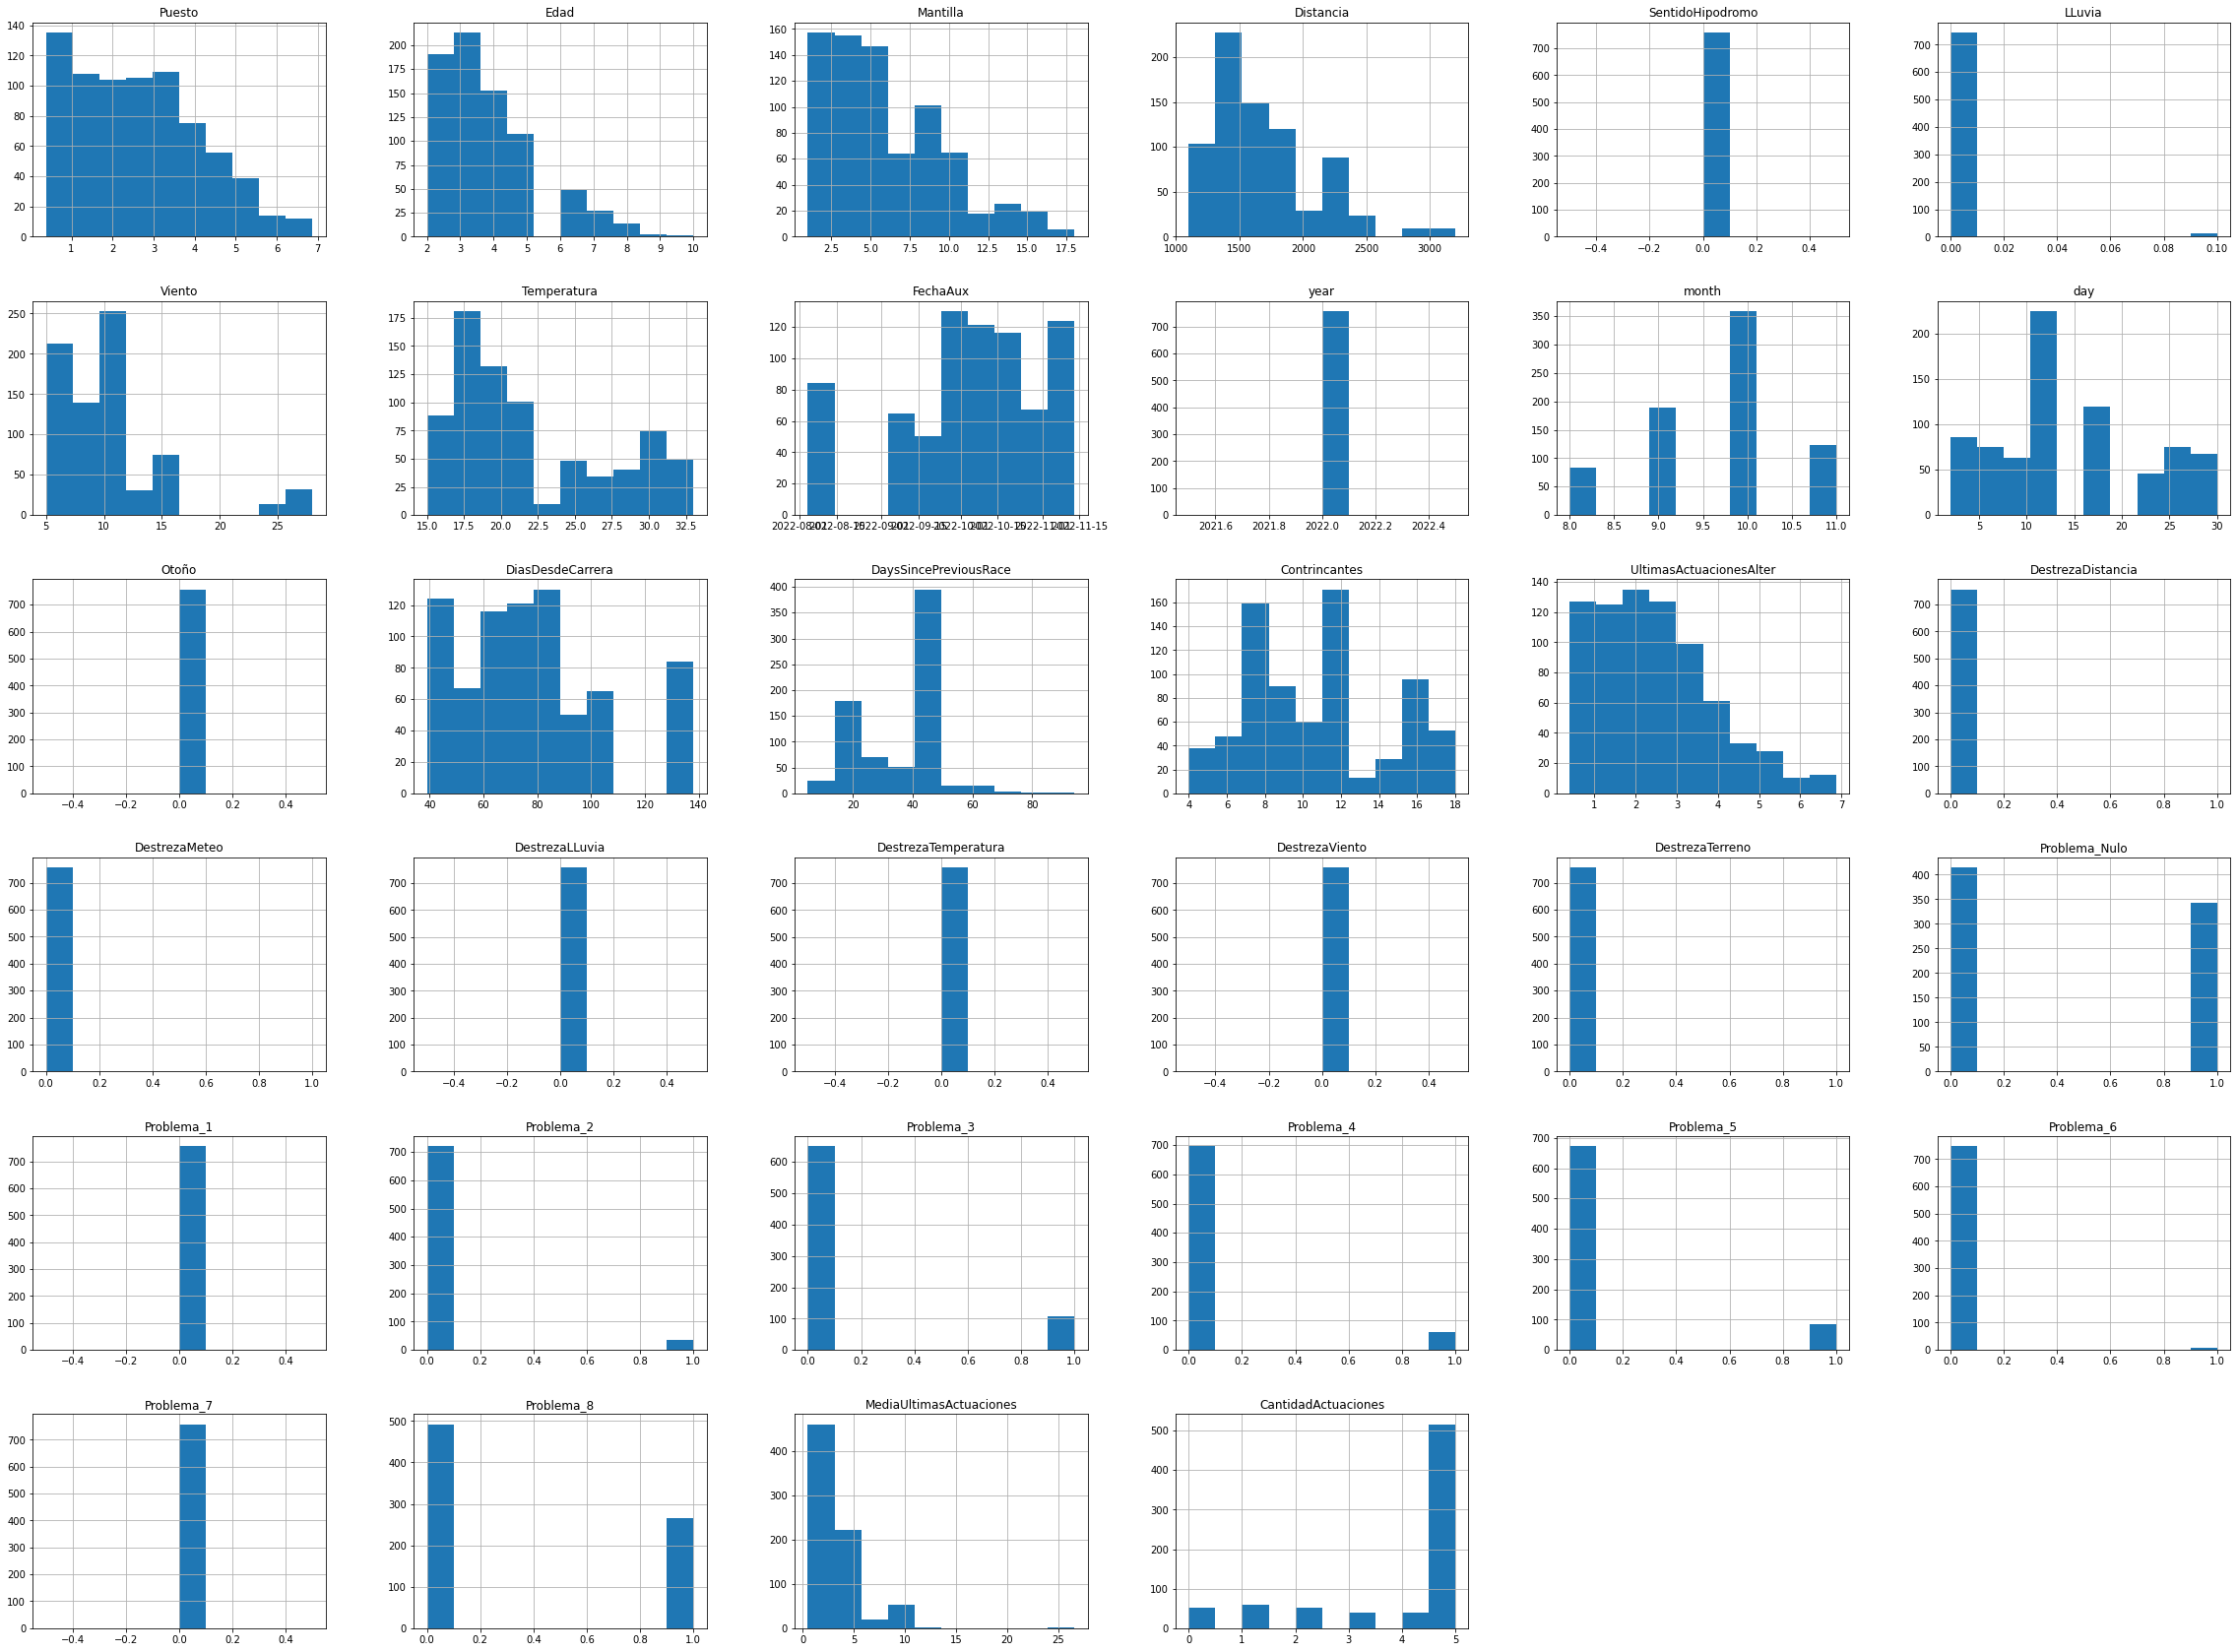

In [ ]:
train.hist(figsize = (40,30))

In [ ]:
train['Puesto'].corr(train['MediaUltimasActuaciones'])

0.2183761208382705

In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]


print("Correlation -->", train['Puesto'].corr(train['UltimasActuacionesAlter']))    
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=kendall_pval))
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=pearsonr_pval))   
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=spearmanr_pval))

0.6573208452136061
6.003550015499334e-104
7.769358375926719e-95
1.1724405271838767e-91


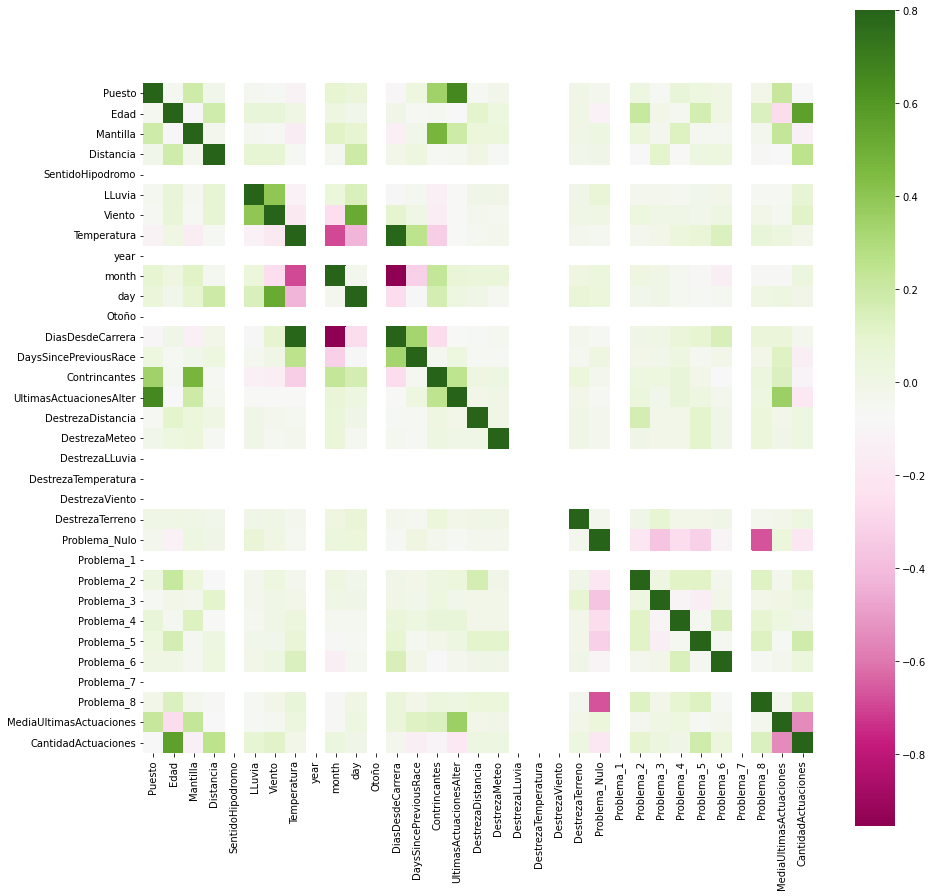

In [ ]:
C_mat = train.corr()
fig = plt.figure(figsize = (15,15))

#Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
#The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
#A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

sns.heatmap(C_mat, vmax = .8, square = True, cmap="PiYG")
plt.show()

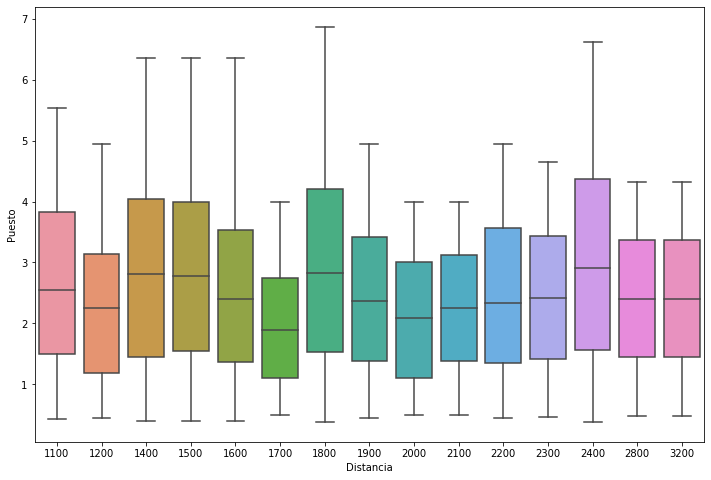

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Distancia', y='Puesto')

plt.show()

In [ ]:
print(len(train[(train['Distancia'] < 1600).tolist()]))

print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))

print(len(train[(train['Distancia'] >= 3200).tolist()]))

330
409
9


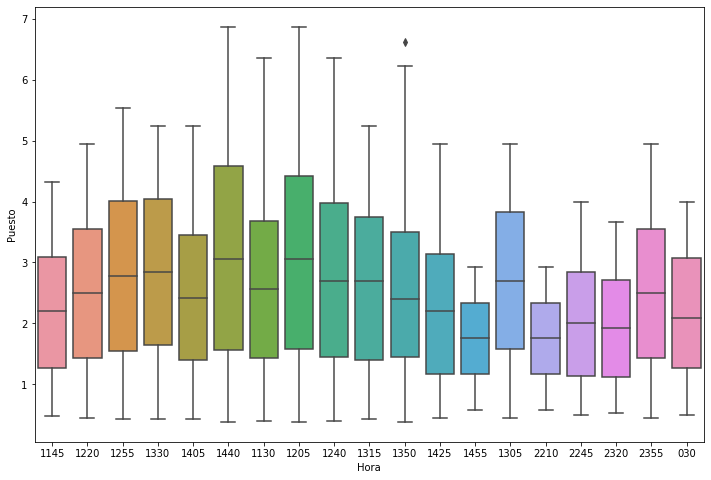

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Hora', y='Puesto')

plt.show()

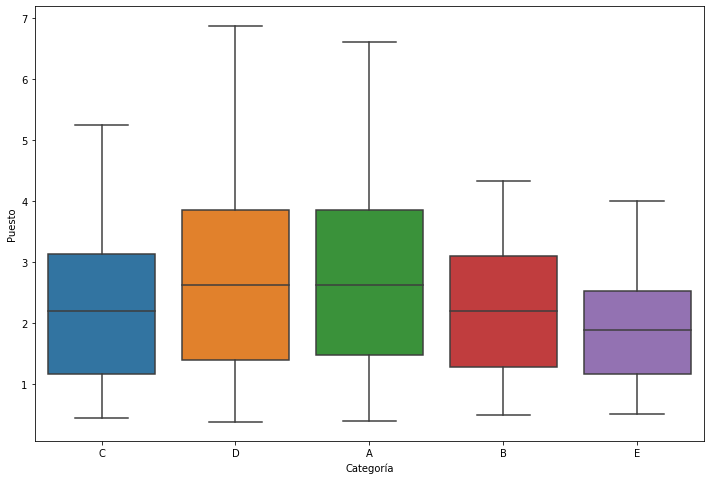

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Categoría', y='Puesto')

plt.show()

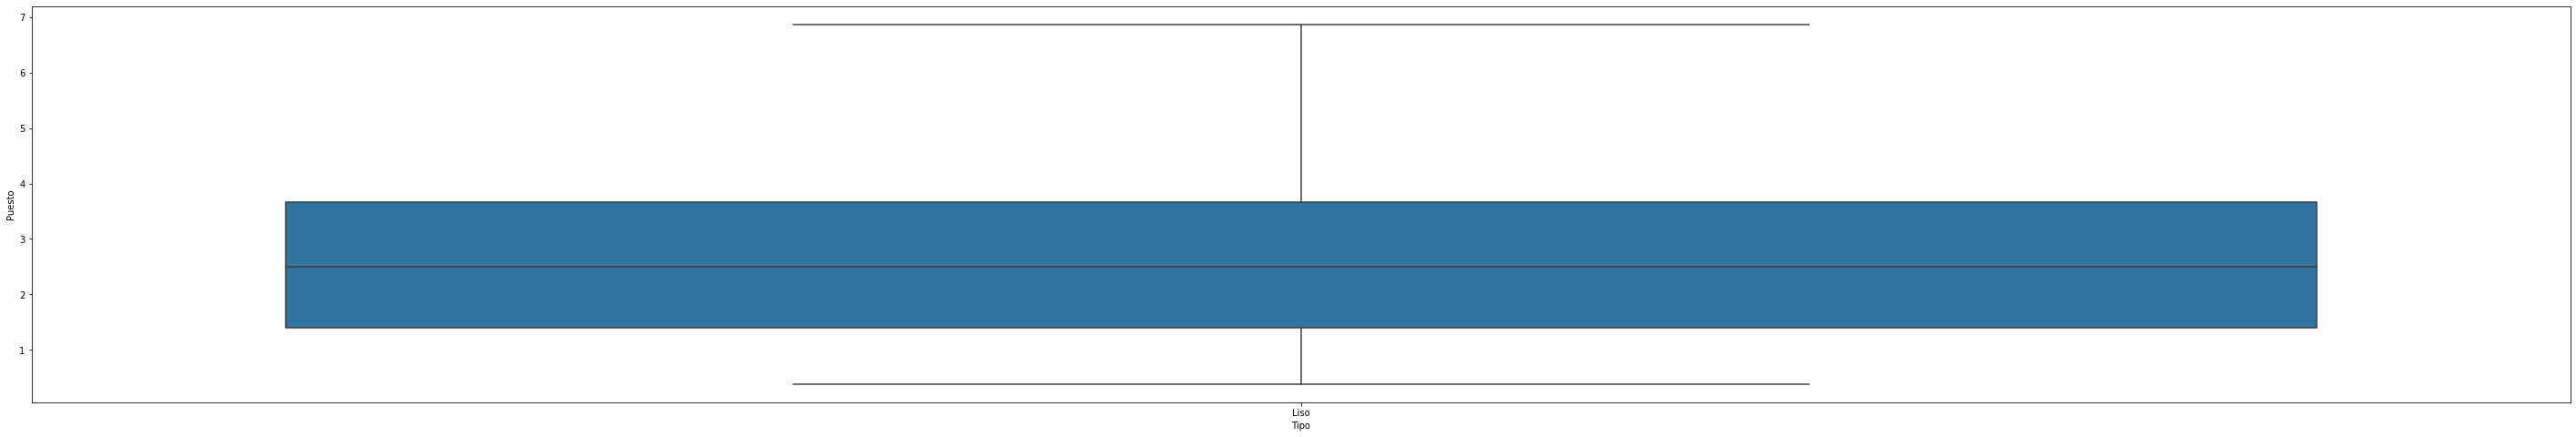

In [ ]:
plt.figure(figsize=(50,8))
sns.boxplot(data=train, x='Tipo', y='Puesto')

plt.show()

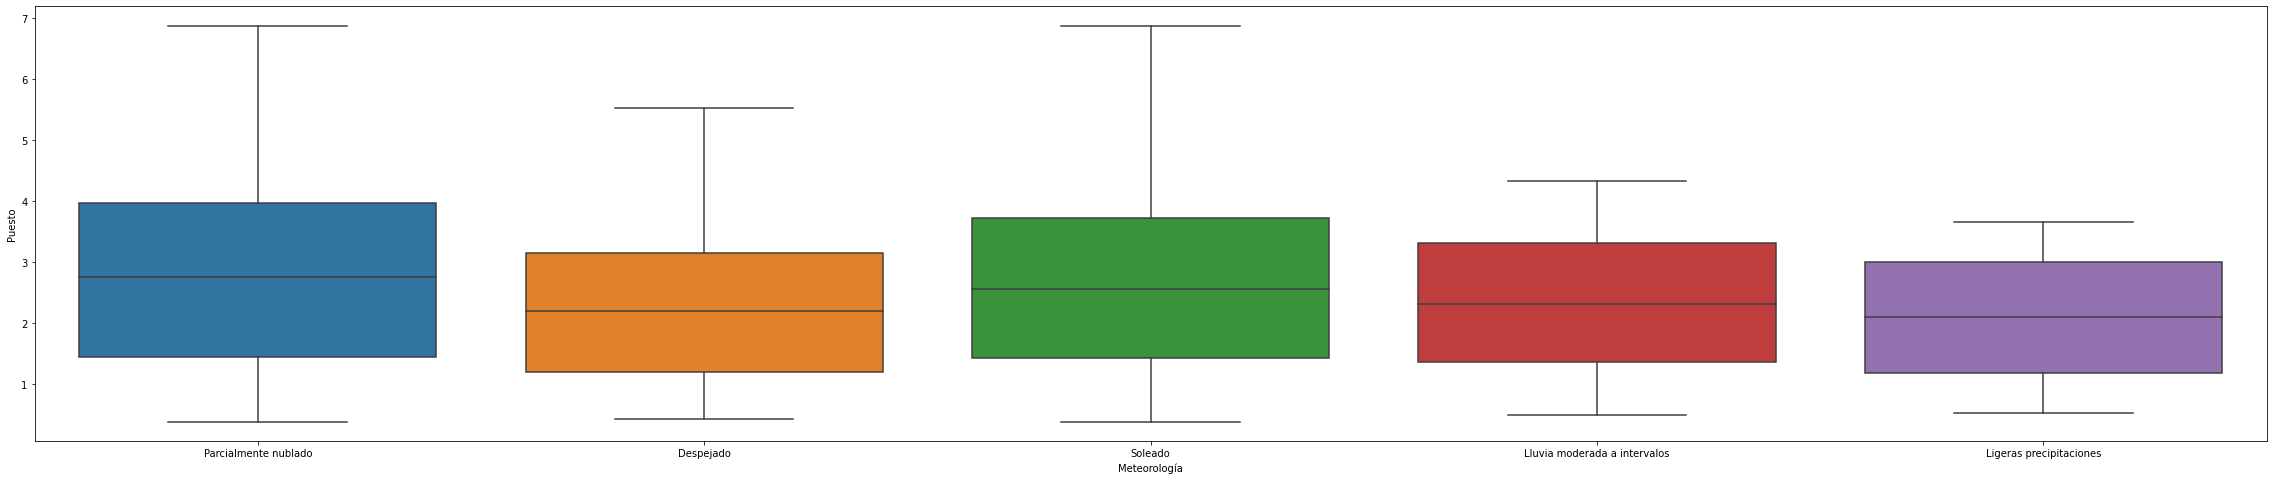

In [ ]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='Meteorología', y='Puesto')

plt.show()

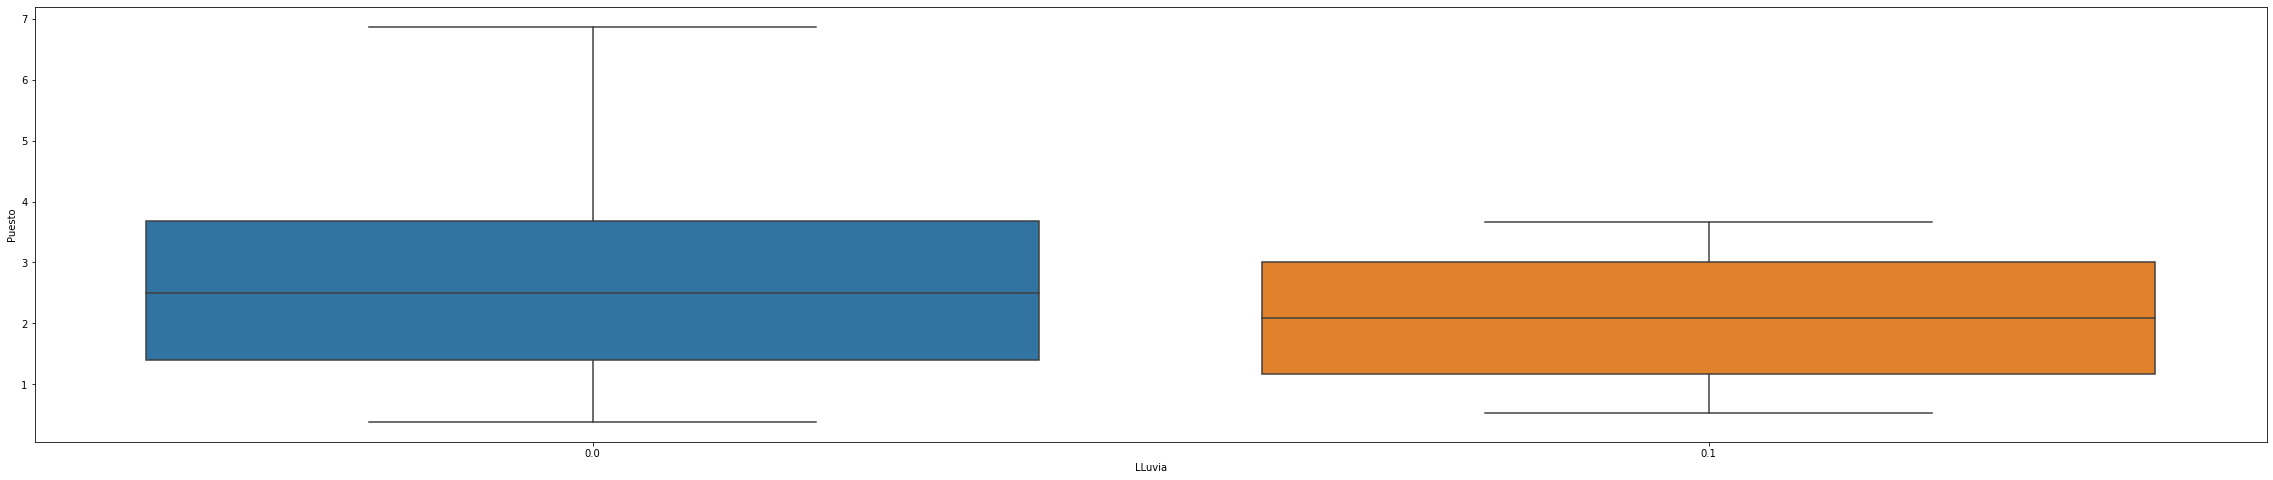

In [ ]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='LLuvia', y='Puesto')

plt.show()

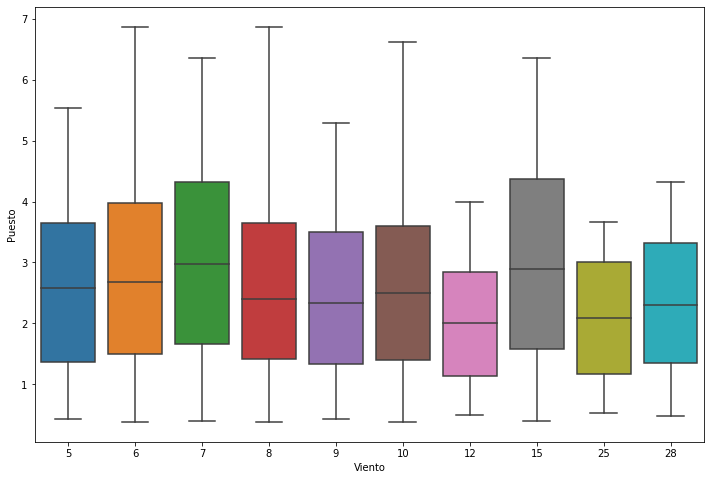

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Viento', y='Puesto')

plt.show()

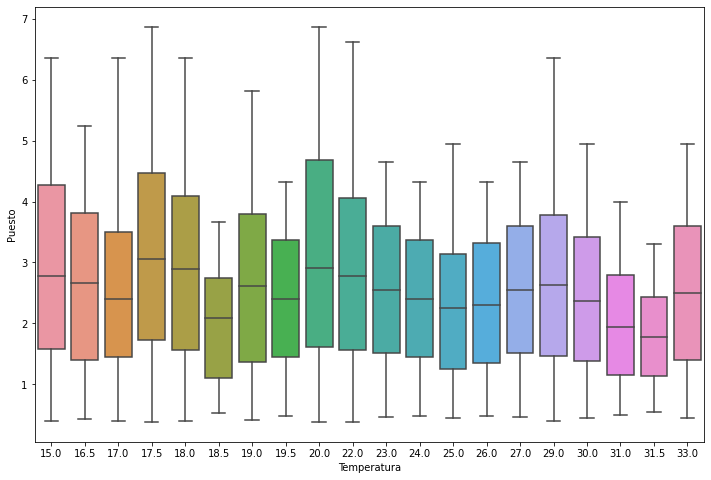

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Temperatura', y='Puesto')

plt.show()

# Preprocesamiento Final

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   757 non-null    float64       
 1   NombreCaballo            757 non-null    object        
 2   Peso                     757 non-null    object        
 3   Edad                     757 non-null    int64         
 4   Mantilla                 757 non-null    int64         
 5   Propietario              757 non-null    object        
 6   Preparador               757 non-null    object        
 7   Jinete                   757 non-null    object        
 8   Problemas                757 non-null    object        
 9   UltimasActuaciones       757 non-null    object        
 10  Fecha                    757 non-null    object        
 11  Hora                     757 non-null    object        
 12  Terreno                  757 non-nul

In [ ]:
import sklearn
import sklearn.compose
#Solo ejecutar previo a esto product para separar las palabras
column_transformer_train = sklearn.compose.ColumnTransformer(transformers=[
    ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'FechaAux', 'Terreno', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [ ]:
train = train.reset_index()
X=train
X = X.drop(["Puesto"], axis = 1)

In [ ]:
X_transform = column_transformer_train.fit_transform(X)

In [ ]:
column_transformer_train.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one-hot__x0_AMERICANO',
 'one-hot__x0_ARETHA',
 'one-hot__x0_ASTRAL',
 'one-hot__x0_ASTURIAS',
 'one-hot__x0_ATLANTICO',
 'one-hot__x0_AUSTRALIA CAPE',
 'one-hot__x0_CAROLINA WEST',
 'one-hot__x0_CHUSQUEZ',
 'one-hot__x0_EL CANEY',
 'one-hot__x0_EMBAT',
 'one-hot__x0_FAITH ROSE',
 'one-hot__x0_FINELY TUNED',
 'one-hot__x0_FORTUNATO',
 'one-hot__x0_HIGHLAND MARKET',
 'one-hot__x0_IZAMAL',
 'one-hot__x0_KANE ORE',
 'one-hot__x0_LA MAL AMADA',
 'one-hot__x0_LADY RAZALMA',
 'one-hot__x0_MAITRE YODA',
 'one-hot__x0_MEDICEAN BLUE',
 'one-hot__x0_MONTERREDONDO',
 'one-hot__x0_ORBAYO',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PIU BIRCH',
 'one-hot__x0_ROBAYERA',
 'one-hot__x0_ROBLON',
 'one-hot__x0_RUMBERA',
 'one-hot__x0_SANCTI PETRI',
 'one-hot__x0_SANS ATTENDRE',
 'one-hot__x0_SEVERUS',
 'one-hot__x0_SHELBY',
 'one-hot__x0_SOFUNNY',
 'one-hot__x0_SOGALINDA',
 'one-hot__x0_STARSHADOW',
 'one-hot__x0_THE GAME',
 'one-hot__x0_TRES DE TREBOL',
 'one-hot__x0_UPSDAWN',
 'one-hot__x0_UPSILON',
 

In [ ]:
train 
X_transform
X = X_transform       #Nos quedamos con todo menos la columna objetivo, en este caso 'price'
y = train["Puesto"]

In [ ]:
train[['NombreCaballo','MediaUltimasActuaciones']].head(128)

,NombreCaballo,MediaUltimasActuaciones
0,OtherHorse,1.456720
1,OtherHorse,2.500000
2,OtherHorse,0.500000
3,OtherHorse,5.750000
4,OtherHorse,5.000000
5,OtherHorse,3.000000
6,OtherHorse,2.250000
7,OtherHorse,1.000000
8,OtherHorse,2.896886
9,OtherHorse,4.428258


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1920)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

#Regresión lineal
linear = LinearRegression()
linear.fit(X_train, y_train)

#Regresión de Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

#LASSO

lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

#ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train);


reg = SGDRegressor(max_iter=50, random_state=43)
reg.fit(X_train, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    elasticnet = ElasticNet(alpha=i*0.1, l1_ratio=j*0.1)
    elasticnet.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 0 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 1 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 2 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 3 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 4 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 5 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 6 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 7 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 8 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-228-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7057398409746324
0 9 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.74169100624977, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.7057398409746324
0 10 0.9648252523652026


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.2772231390726, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8356786624471902
1 0 0.834197615918216
ElasticNet (train): 0.8532531727622172
1 1 0.8332768670475844
ElasticNet (train): 0.859813923139652
1 2 0.8384935823281193
ElasticNet (train): 0.8650906739907515
1 3 0.842396597068745
ElasticNet (train): 0.8683231340421643
1 4 0.8449439173086379
ElasticNet (train): 0.8712540801016493
1 5 0.8471407430389805
ElasticNet (train): 0.8729702351232436
1 6 0.8486651097071942
ElasticNet (train): 0.8737531787466641
1 7 0.850250774110054
ElasticNet (train): 0.8745463072540092
1 8 0.8518535934474804
ElasticNet (train): 0.8753565159781971
1 9 0.8534738440673775
ElasticNet (train): 0.8761762532497921
1 10 0.855111807995978


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.9976694974331, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8587225398797835
2 0 0.8542281451362854
ElasticNet (train): 0.8747475274646781
2 1 0.8610068209514001
ElasticNet (train): 0.8807537476858815
2 2 0.8664804078211537
ElasticNet (train): 0.8845726123420846
2 3 0.8701631884634844
ElasticNet (train): 0.8862624499872351
2 4 0.8734916863778327
ElasticNet (train): 0.8881043131363281
2 5 0.8768899566163145
ElasticNet (train): 0.890036848170471
2 6 0.8803592717408126
ElasticNet (train): 0.8920328375562446
2 7 0.8839326261288525
ElasticNet (train): 0.8941283721490968
2 8 0.8875921841129416
ElasticNet (train): 0.8962900861773886
2 9 0.8913303230745048
ElasticNet (train): 0.8985293550635569
2 10 0.8951572356633067


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.2995739569605, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8749888721285325
3 0 0.8751297025670535
ElasticNet (train): 0.8909302869859693
3 1 0.884170187363628
ElasticNet (train): 0.8963361216529211
3 2 0.8898773107733619
ElasticNet (train): 0.8990561799496344
3 3 0.8950439111203743
ElasticNet (train): 0.9020884747948414
3 4 0.9003433712213881
ElasticNet (train): 0.9052504995764327
3 5 0.905810168478903
ElasticNet (train): 0.908577132908374
3 6 0.9116015996695326
ElasticNet (train): 0.9120473163739384
3 7 0.917652509489664
ElasticNet (train): 0.9158251025939728
3 8 0.9239478360794657
ElasticNet (train): 0.9198684024531484
3 9 0.9304422426016111
ElasticNet (train): 0.9240675211422421
3 10 0.9371455149283512


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.67696202216985, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8886596012372231
4 0 0.8941717486558699
ElasticNet (train): 0.9045930978795229
4 1 0.9042425935797745
ElasticNet (train): 0.9094780828936311
4 2 0.9114271787390571
ElasticNet (train): 0.9131719425909282
4 3 0.9188113515173618
ElasticNet (train): 0.9177361863051119
4 4 0.9264332493322591
ElasticNet (train): 0.9225924104843597
4 5 0.9344550936050517
ElasticNet (train): 0.9277752547330819
4 6 0.9428082862767481
ElasticNet (train): 0.9332997035844821
4 7 0.9514993361506444
ElasticNet (train): 0.939092362602929
4 8 0.9605494644687463
ElasticNet (train): 0.9452253294619665
4 9 0.9700017990459037
ElasticNet (train): 0.9516743393247099
4 10 0.9800044577748483


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.87044599357966, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.9008861755692507
5 0 0.9115399505865442
ElasticNet (train): 0.9169464674473511
5 1 0.9227471370842559
ElasticNet (train): 0.9220703462140352
5 2 0.9318930047333108
ElasticNet (train): 0.9273505748901661
5 3 0.9417397693973192
ElasticNet (train): 0.9335066804553698
5 4 0.951679002478631
ElasticNet (train): 0.9401204633903695
5 5 0.9620890332304728
ElasticNet (train): 0.9470926661626956
5 6 0.9730514795363786
ElasticNet (train): 0.9545946315169354
5 7 0.9847021711561745
ElasticNet (train): 0.9626516490574106
5 8 0.9970110320163821
ElasticNet (train): 0.9713529427328379
5 9 1.0101937334370548
ElasticNet (train): 0.9811851719749641
5 10 1.0241056833865627


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.2150148200383, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.9119003365815012
6 0 0.9273316679832555
ElasticNet (train): 0.9282392773966236
6 1 0.9398125859230172
ElasticNet (train): 0.934371317495787
6 2 0.9511300606794111
ElasticNet (train): 0.9411119406297007
6 3 0.963347233157012
ElasticNet (train): 0.9488322087521706
6 4 0.9756268312997718
ElasticNet (train): 0.957141946156918
6 5 0.9887151311531277
ElasticNet (train): 0.9662630943819291
6 6 1.0026540232610193
ElasticNet (train): 0.9763817987260384
6 7 1.0176232741328852
ElasticNet (train): 0.9878449570824767
6 8 1.0335434282473275
ElasticNet (train): 1.0001352422455463
6 9 1.0505939651923049
ElasticNet (train): 1.013511604620618
6 10 1.0690306441530535


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.90061118252027, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.921881658831771
7 0 0.9418605454181626
ElasticNet (train): 0.9385721157923372
7 1 0.9556057752728812
ElasticNet (train): 0.9460408927419011
7 2 0.9690655765641432
ElasticNet (train): 0.9541795465654649
7 3 0.9838390305131482
ElasticNet (train): 0.9635845965702757
7 4 0.9985993348222459
ElasticNet (train): 0.974153487782628
7 5 1.014519149553674
ElasticNet (train): 0.9862649455159236
7 6 1.0315945022038402
ElasticNet (train): 0.9995192335963823
7 7 1.0500067515146116
ElasticNet (train): 1.0140207514452564
7 8 1.0699096613255905
ElasticNet (train): 1.02986126393265
7 9 1.0914758017001367
ElasticNet (train): 1.0470215608263074
7 10 1.1147780874982964


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.0507111987784, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.9312312702024947
8 0 0.9551834375264425
ElasticNet (train): 0.948203874671356
8 1 0.9702466446025914
ElasticNet (train): 0.9569990383333529
8 2 0.9858409064956061
ElasticNet (train): 0.9666747085074947
8 3 1.0033151002358534
ElasticNet (train): 0.9784033913771567
8 4 1.0207053269302468
ElasticNet (train): 0.991772354890119
8 5 1.0394370513791578
ElasticNet (train): 1.0065604699654394
8 6 1.0598644952521319
ElasticNet (train): 1.0227113952326277
8 7 1.0819335971513802
ElasticNet (train): 1.0405105984257872
8 8 1.1060329926745198
ElasticNet (train): 1.059856576992443
8 9 1.1323451000952323
ElasticNet (train): 1.0812327392327947
8 10 1.1617341531701368


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.75287155602507, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.9399799963266846
9 0 0.9673946164915124
ElasticNet (train): 0.95723479079637
9 1 0.9838579061692199
ElasticNet (train): 0.9673753915408156
9 2 1.0017876058971105
ElasticNet (train): 0.9792841425296956
9 3 1.0219453195934465
ElasticNet (train): 0.99338220752776
9 4 1.0418841359152984
ElasticNet (train): 1.0091979094773735
9 5 1.063682912148558
ElasticNet (train): 1.026572532206442
9 6 1.087316580306902
ElasticNet (train): 1.0457606393319638
9 7 1.1132509123160517
ElasticNet (train): 1.0668135974241804
9 8 1.1418743668071092
ElasticNet (train): 1.0901991963966244
9 9 1.1739379523591094
ElasticNet (train): 1.116085461250775
9 10 1.2095942952385867


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.07285026949535, tolerance: 0.10796145841553971
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.948057164384159
10 0 0.9786384225543782
ElasticNet (train): 0.9657341012118058
10 1 0.996552665871919
ElasticNet (train): 0.9774021763916314
10 2 1.016906488119809
ElasticNet (train): 0.9917642990457793
10 3 1.039655048595762
ElasticNet (train): 1.0080401987123395
10 4 1.0623184824463783
ElasticNet (train): 1.0261609970229633
10 5 1.0869244802294433
ElasticNet (train): 1.0462436261377446
10 6 1.1139925277032343
ElasticNet (train): 1.0684215006113282
10 7 1.1440695653669153
ElasticNet (train): 1.0931139815717952
10 8 1.1779386355448949
ElasticNet (train): 1.1207039306225945
10 9 1.2158289481029092
ElasticNet (train): 1.1522145573215243
10 10 1.2577294600612254


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") #subsample ojo
    xgb_model.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

ElasticNet (train): 0.5422928315824637
0 0 0.789597113922385
ElasticNet (train): 0.5441611182100754
0 1 0.7759240811420522
ElasticNet (train): 0.5517859360773416
0 2 0.7915765250178507
ElasticNet (train): 0.5561140129015197
0 3 0.7923916262931466
ElasticNet (train): 0.5590847539428527
0 4 0.7849626811927753
ElasticNet (train): 0.5691862938166125
0 5 0.7869555179707329
ElasticNet (train): 0.563938380821252
0 6 0.7706360022068318
ElasticNet (train): 0.5614027843351898
0 7 0.770153311838184
ElasticNet (train): 0.5579622383433599
0 8 0.7685930264539316
ElasticNet (train): 0.5711816856303199
0 9 0.7667158664830078
ElasticNet (train): 0.558553308290277
0 10 0.7677349051669733
ElasticNet (train): 0.5502627252461956
1 0 0.7899796897334125
ElasticNet (train): 0.543432634868144
1 1 0.7846760808853335
ElasticNet (train): 0.5558782940861289
1 2 0.7853643738943125
ElasticNet (train): 0.5599799205662972
1 3 0.7871547775824249
ElasticNet (train): 0.5678679700493329
1 4 0.7894279236510114
ElasticNet (

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=7*0.1, reg_lambda=4*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact")

xgb_model.fit(X, y)
#print('Lineal (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X))))
#print('Lineal (test): ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

XGBRegressor(eta=0.2, objective='reg:squarederror', random_state=42,
             reg_alpha=0.7000000000000001, reg_lambda=0.4, tree_method='exact',
             verbosity=0)

In [ ]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
params = {"depth": 10, "learning_rate": 0.5, "iterations": 50, "l2_leaf_reg": 5} #Iterations CatBoost
model_cat_tun = cb.CatBoostClassifier(**params)
model_cat_tun.fit(X,y)

0:	learn: 5.0092160	total: 5.94s	remaining: 4m 51s
1:	learn: 4.9098825	total: 12.6s	remaining: 5m 1s
2:	learn: 4.8085409	total: 20.5s	remaining: 5m 21s
3:	learn: 4.6982321	total: 27.9s	remaining: 5m 21s
4:	learn: 4.5989461	total: 35.3s	remaining: 5m 18s
5:	learn: 4.5006534	total: 43.1s	remaining: 5m 15s
6:	learn: 4.4005158	total: 50.4s	remaining: 5m 9s
7:	learn: 4.3009441	total: 55.7s	remaining: 4m 52s
8:	learn: 4.2018177	total: 59.8s	remaining: 4m 32s
9:	learn: 4.1012073	total: 1m 3s	remaining: 4m 14s
10:	learn: 3.9984482	total: 1m 7s	remaining: 3m 59s
11:	learn: 3.9026411	total: 1m 11s	remaining: 3m 46s
12:	learn: 3.7972862	total: 1m 15s	remaining: 3m 34s
13:	learn: 3.7000775	total: 1m 19s	remaining: 3m 24s
14:	learn: 3.6065663	total: 1m 23s	remaining: 3m 14s
15:	learn: 3.5126404	total: 1m 27s	remaining: 3m 5s
16:	learn: 3.4163558	total: 1m 31s	remaining: 2m 56s
17:	learn: 3.3246060	total: 1m 34s	remaining: 2m 48s
18:	learn: 3.2229731	total: 1m 38s	remaining: 2m 41s
19:	learn: 3.1334

In [ ]:
from sklearn.metrics import mean_absolute_error

print('---')

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Lineal (test): ' + str(mean_absolute_error(y_test, linear.predict(X_test))))

print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Ridge (test): ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))

print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('LASSO (test): ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))

print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('ElasticNet (test): ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

print('---')

print('SGD (train): ' + str(mean_absolute_error(y_train, reg.predict(X_train))))
print('SGD (test): ' + str(mean_absolute_error(y_test, reg.predict(X_test))))

---
Lineal (train): 0.7057909740886167
Lineal (test): 0.9653928410281379
---
Ridge (train): 0.7575494114235125
Ridge (test): 0.8958795438293523
---
LASSO (train): 1.1522145573215243
LASSO (test): 1.2577294600612254
---
ElasticNet (train): 1.1522145573215243
ElasticNet (test): 1.2577294600612254
---
SGD (train): 1816337284486153.2
SGD (test): 1855578862618832.5


In [ ]:
from sklearn.metrics import accuracy_score

print('Lineal (train): ' + str(linear.score(X_train, y_train)))
print('Lineal (test): ' + str(linear.score(X_test, y_test)))
print('---')
print('Ridge (train): ' + str(ridge.score(X_train, y_train)))
print('Ridge (test): ' + str(ridge.score(X_test, y_test)))
print('---')
print('LASSO (train): ' + str(lasso.score(X_train, y_train)))
print('LASSO (test): ' + str(lasso.score(X_test, y_test)))
print('---')
print('ElasticNet (train): ' + str(elasticnet.score(X_train, y_train)))
print('ElasticNet (test): ' + str(elasticnet.score(X_test, y_test)))

Lineal (train): 0.5521703008508376
Lineal (test): 0.33283831500061245
---
Ridge (train): 0.5096958693828249
Ridge (test): 0.4835272841650813
---
LASSO (train): 0.09595378680833022
LASSO (test): 0.1235795083126141
---
ElasticNet (train): 0.09595378680833022
ElasticNet (test): 0.1235795083126141


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Lineal (train): ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Lineal (test): ' + str(sqrt(mean_squared_error(y_test, linear.predict(X_test)))))
print('---')
print('Ridge (train): ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Ridge (test): ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
print('---')
print('LASSO (train): ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('LASSO (test): ' + str(sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
print('---')
print('ElasticNet (train): ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('ElasticNet (test): ' + str(sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))

Lineal (train): 0.9765328055696676
Lineal (test): 1.3125797065034959
---
Ridge (train): 1.0217935753483411
Ridge (test): 1.1548719384406765
---
LASSO (train): 1.3874767276063704
LASSO (test): 1.5044106480704644
---
ElasticNet (train): 1.3874767276063704
ElasticNet (test): 1.5044106480704644


# Optimización
---

Linear
---

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
fit_intercept = [True, False]
copy_x = [True, False]
normalize = [True, False]

In [ ]:
linear_Grid = GridSearchCV(
  estimator = LinearRegression(),
  param_grid = dict(fit_intercept = fit_intercept, copy_X = copy_x, normalize = normalize),
  cv = 5
)
linear_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [ ]:
linear_Grid.best_estimator_

LinearRegression(normalize=True)

In [ ]:
linear_Grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [ ]:
linear_Grid.best_score_

0.11198548200993444

In [ ]:
linear = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
linear.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [ ]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, linear.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(linear.score(X_train, y_train)))
print("Test: " + str(linear.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))

MAE: 
Train: 0.7057909740886167
Test: 0.9653928410281379
---------------------------------------
R^2: 
Train: 0.5521703008508376
Test: 0.33283831500061245
---------------------------------------
RMST: 
Train: 0.9765328055696676
Test: 0.9765328055696676


Se puede observar que no mejora ya que los parámetros que nos da el GridSearch son los mismos que tiene de base.

Ridge
---

In [ ]:
ridge_Grid = GridSearchCV(
  estimator = Ridge(),
  param_grid = dict(alpha= np.linspace(0, 1, 50), copy_X = copy_x, fit_intercept=fit_intercept, normalize = normalize),
  cv = 5

)
ridge_Grid.fit(X, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [ ]:
ridge_Grid.best_estimator_

Ridge(alpha=0.3877551020408163, normalize=True)

In [ ]:
ridge_Grid.best_params_

{'alpha': 0.3877551020408163,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': True}

In [ ]:
ridge_Grid.best_score_

0.26804945490898735

In [ ]:
ridge = Ridge(alpha=0.32653061224489793, copy_X=True, fit_intercept=True,
      normalize=True, random_state=1337, solver='auto', tol=0.001)
ridge.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.32653061224489793, normalize=True, random_state=1337)

In [ ]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(ridge.score(X_train, y_train)))
print("Test: " + str(ridge.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))

MAE: 
Train: 0.7992287281258958
Test: 0.9976153986740481
---------------------------------------
R^2: 
Train: 0.4944210977368291
Test: 0.3865885844975988
---------------------------------------
RMST: 
Train: 1.0375878150850697
Test: 1.2585951792361971


Parece que empeora ligeramente con respecto a los valores por defecto que tenía antes.

LASSO
---

In [ ]:
lasso_Grid = GridSearchCV(estimator = linear_model.Lasso(), param_grid = dict(alpha= np.linspace(0.05,1,20)), cv = 5)
lasso_Grid.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])})

In [ ]:
lasso_Grid.best_params_

{'alpha': 0.25}

In [ ]:
lasso = linear_model.Lasso(alpha=1, random_state=1337)
lasso.fit(X_train, y_train)

Lasso(alpha=1, random_state=1337)

In [ ]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))

MAE: 
Train: 1.1522145573215243
Test: 1.2577294600612254
---------------------------------------
R^2: 
Train: 0.09595378680833022
Test: 0.1235795083126141
---------------------------------------
RMST: 
Train: 1.3874767276063704
Test: 1.3874767276063704


Se queda igual que con los valores de base.

ElasticNet
---

Este regresor a veces funciona y a veces explota, dejamos guardado los resultados de cuando ha funcionado. De todos modos nos sale el siguiente error:<br>


```
# /usr/local/lib/python3.6/dist-packages/sklearn linear_model_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.
```



In [ ]:
elastic_Grid = GridSearchCV(
  estimator = ElasticNet(),
  param_grid = dict(alpha=np.linspace(0.1,1,2), l1_ratio=np.linspace(0,1,2)),
  cv = 5
)
elastic_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.5567894853693, tolerance: 0.13417596382382174
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347.4737386246656, tolerance: 0.14023938532456093
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366.32848667181906, tolerance: 0.1341797050170131
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: Conver

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 1. ]),
                         'l1_ratio': array([0., 1.])})

In [ ]:
elastic_Grid.best_params_

{'alpha': 0.1, 'l1_ratio': 1.0}

In [ ]:
elasticnet = ElasticNet(alpha = 1.0, l1_ratio = 1, fit_intercept=True, normalize=False, copy_X=True)
elasticnet.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


ElasticNet(l1_ratio=1, normalize=False)

In [ ]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))

MAE: 
Train: 1.1522145573215243
Test: 1.2577294600612254
---------------------------------------
R^2: 
Train: 0.09595378680833022
Test: 0.1235795083126141
---------------------------------------
RMST: 
Train: 1.3874767276063704
Test: 1.3874767276063704


# Validación Cruzada
---

## Linear

MAE

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [ ]:
cv_scores_linearMAE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearMAE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-1.11113787 -1.01158633 -0.98348359 -1.02653259 -1.12072697]
Média métricas de validación cruzada: -1.0506934688494831


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


R^2

In [ ]:
cv_scores_linearR = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearR}")
print(f"Média métricas de validación cruzada: {cv_scores_linearR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [ 0.19352772  0.06360773  0.25783063  0.15233218 -0.10896345]
Média métricas de validación cruzada: 0.11166696480238385


RMSE

In [ ]:
cv_scores_linearRMSE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-2.02758129 -1.99174685 -1.87699347 -1.98480223 -2.00172417]
Média métricas de validación cruzada: -1.9765696032514852


## Ridge
---

MAE

In [ ]:
cv_scores_ridgeMAE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeMAE.mean()}")

Métricas validación cruzada: [-1.14138176 -1.01827293 -0.99189085 -0.98416183 -0.84430387]
Média métricas de validación cruzada: -0.9960022460331881


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

R^2

In [ ]:
cv_scores_ridgeR = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeR}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeR.mean()}")

Métricas validación cruzada: [0.2281928  0.14963354 0.31137579 0.29438689 0.35491847]
Média métricas de validación cruzada: 0.26770149718615965


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

RMSE

In [ ]:
cv_scores_ridgeRMSE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeRMSE.mean()}")

Métricas validación cruzada: [-1.94042855 -1.80876623 -1.74157437 -1.65218315 -1.16439843]
Média métricas de validación cruzada: -1.6614701477105362


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

## LASSO
---

MAE

In [ ]:
cv_scores_lassoMAE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoMAE.mean()}")

Métricas validación cruzada: [-1.21303913 -1.09993271 -1.18584267 -1.13563992 -1.00246336]
Média métricas de validación cruzada: -1.1273835582548353


R^2

In [ ]:
cv_scores_lassoR = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoR}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoR.mean()}")

Métricas validación cruzada: [0.17222739 0.15628389 0.18340237 0.19512778 0.21091786]
Média métricas de validación cruzada: 0.18359185700855657


RMSE

In [ ]:
cv_scores_lassoRMSE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoRMSE.mean()}")

Métricas validación cruzada: [-2.08113323 -1.79462066 -2.06522727 -1.88459695 -1.4243254 ]
Média métricas de validación cruzada: -1.8499807014799359


## ElasticNet
---

MAE

In [ ]:
cv_scores_netMAE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.21303913 -1.09993271 -1.18584267 -1.13563992 -1.00246336]
Média métricas de validación cruzada: -1.1273835582548353


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

R^2

In [ ]:
cv_scores_netR = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [0.17222739 0.15628389 0.18340237 0.19512778 0.21091786]
Média métricas de validación cruzada: 0.18359185700855657


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


RMSE

In [ ]:
cv_scores_netRMSE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-2.08113323 -1.79462066 -2.06522727 -1.88459695 -1.4243254 ]
Média métricas de validación cruzada: -1.8499807014799359


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


## XGBoost
---

MAE

In [ ]:
cv_scores_netMAE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.13350403 -0.95438471 -0.84129645 -0.61826727 -0.50153241]
Média métricas de validación cruzada: -0.8097969756020259


R^2

In [ ]:
cv_scores_netR = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

Métricas validación cruzada: [0.21573714 0.16775128 0.44245874 0.64157528 0.70175884]
Média métricas de validación cruzada: 0.43385625526316096


RMSE

In [ ]:
cv_scores_netRMSE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

Métricas validación cruzada: [-1.97174379 -1.77022902 -1.41005727 -0.83924642 -0.53833744]
Média métricas de validación cruzada: -1.3059227871628674


# Prueba
---

In [ ]:
train = test
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

PHILIPPO            1
HIGHLAND MARKET     1
LA MAL AMADA        1
ATLANTICO           1
CAROLINA WEST       1
JERY SMAIH          1
RUMBERA             1
SANS ATTENDRE       1
PIU BIRCH           1
CHUSQUEZ            1
ARETHA              1
IZAMAL              1
UPSDAWN             1
ASTURIAS            1
MAITRE YODA         1
AUSTRALIA CAPE      1
SOFUNNY             1
SOGALINDA           1
PONCE DE LEON       1
HADES               1
SEVERUS             1
ROBAYERA            1
VIKING CITY         1
KANE ORE            1
EMBAT               1
MONTERREDONDO       1
USI DE U            1
TRES DE TREBOL      1
MEDICEAN BLUE       1
EL CANEY            1
FINELY TUNED        1
THE GAME            1
ORBAYO              1
ASTRAL              1
LADY RAZALMA        1
Name: NombreCaballo, dtype: int64

# Ajuste Preprocesamiento
- Borrar Puesto
- Ajuste Listas Apariciones

In [ ]:
train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
print(listAparicionesHorse)
listTestHorse= eraseBlank(listaNombreCaballo)



train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train.loc[~train["Propietario"].isin(listAparicionesOwner), "Propietario"] = "OtherOwner"
# train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" #Lo hacemos mas tarde
train.loc[~train["Jinete"].isin(listAparicionesJockey), "Jinete"] = "OtherJockey"
train.loc[~train["Preparador"].isin(listAparicionesTrainer), "Preparador"] = "OtherTrainer"

# if 'OtherOwner' not in train: // No necesario
#   train['OtherOwner'] = 0

# if 'OtherHorse' not in train: // Mas tarde // No necesario
#   train['OtherHorse'] = 0

if 'OtherJockey' not in train:
  train['OtherJockey'] = 0

if 'OtherTrainer' not in train:
  train['OtherTrainer'] = 0


['MONTERREDONDO', 'SOGALINDA', 'ATLANTICO', 'LA MAL AMADA', 'PIU BIRCH', 'ASTURIAS', 'UPSILON', 'SANCTI PETRI', 'ATLANTICO', 'UPSDAWN', 'LADY RAZALMA', 'FAITH ROSE', 'ROBLON', 'STARSHADOW', 'SHELBY', 'WINTON', 'XILADO', "WARRIOR'S REVENGE", 'WALKING TO GLORY', 'FORTUNATO', 'ASTRAL', 'ORBAYO', 'TRES DE TREBOL', 'FINELY TUNED', 'ASTURIAS', 'SEVERUS', 'MAITRE YODA', 'EMBAT', 'THE GAME', 'FINELY TUNED', 'EL CANEY', 'ASTRAL', 'KANE ORE', 'VIKING CITY', 'SOFUNNY', 'SOGALINDA', 'RUMBERA', 'PIU BIRCH', 'CAROLINA WEST', 'ROBAYERA', 'SANS ATTENDRE', 'HIGHLAND MARKET', 'IZAMAL', 'ORBAYO', 'ASTURIAS', 'ARETHA', 'LA MAL AMADA', 'AMERICANO', 'WINTON', 'STARSHADOW', 'UPSDAWN', 'SOGALINDA', 'ATLANTICO', 'PIU BIRCH', 'UPSILON', 'FORTUNATO', 'MAITRE YODA', 'SHELBY', 'STARSHADOW', 'ROBLON', 'UPSDAWN', 'THE GAME', 'FINELY TUNED', 'AUSTRALIA CAPE', 'SEVERUS', 'HIGHLAND MARKET', 'FORTUNATO', 'WALKING TO GLORY', 'LADY RAZALMA', 'CAROLINA WEST', 'SOFUNNY', 'VIKING CITY', 'ARETHA', 'PIU BIRCH', 'TRES DE TREBOL

# Preprocesamiento
---

In [ ]:
train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer
0,PHILIPPO,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
1,PONCE DE LEON,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
2,EL PATER,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
3,BRAGNOSERA,"57,00-56,00",2,2,ZURRAQUIN,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
4,BERTIZ,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0


## **Tratamiento (Peso)**

In [ ]:
train['Peso'] = train['Peso'].str.partition('-')[0]
train['Peso'] = train['Peso'].str[:2]

In [ ]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

56    23
57     9
54     9
58     7
59     5
61     4
60     4
63     2
64     1
Name: Peso, dtype: int64

## **Tratamiento (Fecha)**


In [ ]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(70)

0    2022-11-20
1    2022-11-20
2    2022-11-20
3    2022-11-20
4    2022-11-20
5    2022-11-20
6    2022-11-20
7    2022-11-20
8    2022-11-20
9    2022-11-20
10   2022-11-20
11   2022-11-20
12   2022-11-20
13   2022-11-20
14   2022-11-20
15   2022-11-20
16   2022-11-20
17   2022-11-20
18   2022-11-20
19   2022-11-20
20   2022-11-20
21   2022-11-20
22   2022-11-20
23   2022-11-20
24   2022-11-20
25   2022-11-20
26   2022-11-20
27   2022-11-20
28   2022-11-20
29   2022-11-20
30   2022-11-20
31   2022-11-20
32   2022-11-20
33   2022-11-20
34   2022-11-20
35   2022-11-20
36   2022-11-20
37   2022-11-20
38   2022-11-20
39   2022-11-20
40   2022-11-20
41   2022-11-20
42   2022-11-20
43   2022-11-20
44   2022-11-20
45   2022-11-20
46   2022-11-20
47   2022-11-20
48   2022-11-20
49   2022-11-20
50   2022-11-20
51   2022-11-20
52   2022-11-20
53   2022-11-20
54   2022-11-20
55   2022-11-20
56   2022-11-20
57   2022-11-20
58   2022-11-20
59   2022-11-20
60   2022-11-20
61   2022-11-20
62   202

In [ ]:
train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,PHILIPPO,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0
1,PONCE DE LEON,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0
2,EL PATER,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0
3,BRAGNOSERA,57,2,2,ZURRAQUIN,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0
4,BERTIZ,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0


In [ ]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones











0     45.0
1     45.0
2     45.0
3     45.0
4     45.0
5     45.0
6     45.0
7     45.0
8     45.0
9     45.0
10    45.0
11    45.0
12    45.0
13    45.0
14    45.0
15    45.0
16    45.0
17    45.0
18    45.0
19    45.0
20    45.0
21    45.0
22    45.0
23    45.0
24    45.0
25    45.0
26    45.0
27    45.0
28    45.0
29    45.0
30    45.0
31    45.0
32    45.0
33    45.0
34    45.0
Name: DaysSincePreviousRace, dtype: float64

## Calculo Contricantes
---

In [ ]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda Distancia
---

In [ ]:
pd.set_option('display.max_rows', None)
train.head(70)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes
0,PHILIPPO,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0
1,PONCE DE LEON,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0
2,EL PATER,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0
3,BRAGNOSERA,57,2,2,ZURRAQUIN,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0
4,BERTIZ,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0
5,SANDRO,57,2,6,OtherOwner,A.SOTO,J.L. MARTINEZ,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0
6,GRAZALEMA,56,2,2,MEDITERRANEO,G.ARIZKORRETA,J.L. MARTINEZ,NaN,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,9.0
7,NICOLASA,56,2,6,OtherOwner,J.M.OSORIO,B. FAYOS,-4,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,9.0
8,LA PERLA NEGRA,56,2,4,OtherOwner,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,9.0
9,WHITY,56,2,9,YEGUADA AGF,G.ARIZKORRETA,J.GELABERT,NaN,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,9.0


In [ ]:
def comprobacionTipoDistanciaTrain(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = trainOg.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def comprobacionTipoDistanciaTest(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;
  
def destrezaDistanciaTest(indices,indicesOg):                      
  for i in range(indices):
    tipo = comprobacionTipoDistanciaTest(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistanciaTrain(j)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          
          media += (trainOg.at[j, 'Puesto'])
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'])
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones en esas condiciones y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        
    #IMP! Valorar si es buena idea crear una columna a partir de la variable "media" + "mediaAux" obtenida aqui.

indices = len(train.index)
indicesOg = len(trainOg.index)
destrezaDistanciaTest(indices, indicesOg)



#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0 --> PHILIPPO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1 --> PONCE DE LEON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2 --> EL PATER  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
3 --> BRAGNOSERA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
4 --> BERTIZ  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5 --> SANDRO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6 --> GRAZALEMA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
7 --> NICOLASA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
8 --> LA PERLA NEGRA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9 --> WHITY  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10 --> AFRODITA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
11 --> VADALEW  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
12 --> HEBE  - Media

In [ ]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(64)

,NombreCaballo,DestrezaDistancia
0,PHILIPPO,0.0
1,PONCE DE LEON,0.0
2,EL PATER,0.0
3,BRAGNOSERA,0.0
4,BERTIZ,0.0
5,SANDRO,0.0
6,GRAZALEMA,0.0
7,NICOLASA,0.0
8,LA PERLA NEGRA,0.0
9,WHITY,0.0


### Busqueda Meteorologia
---

In [ ]:
train['Meteorología'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

Parcialmente nublado    64
Name: Meteorología, dtype: int64

In [ ]:
def comprobacionTipoMeteorologia(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = train.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "precipitaciones" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaMeteo):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoMeteorologia(i, listaMeteo)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoMeteorologia(j, listaMeteo)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaMeteo'] = 1
      print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    else:
      train.at[i, 'DestrezaMeteo'] = 0
        

indices = len(train.index)
listaMeteo = train['Meteorología'].unique().tolist()
destrezaMeteorologia(indices, listaMeteo)

0
0 --> PHILIPPO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> PONCE DE LEON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> EL PATER  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
3
3 --> BRAGNOSERA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
4
4 --> BERTIZ  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> SANDRO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> GRAZALEMA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
7
7 --> NICOLASA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
8
8 --> LA PERLA NEGRA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> WHITY  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> AFRODITA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
11
11 --> VADALEW  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero O

### Busqueda Lluvia
---

In [ ]:
train['LLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0    64
Name: LLuvia, dtype: int64

In [ ]:
def comprobacionTipoLLuvia(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = train.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, listaLLuvia):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoLLuvia(i, listaLLuvia)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoLLuvia(j, listaLLuvia)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaLLuvia'] = 1
    else:
      train.at[i, 'DestrezaLLuvia'] = 0
        

indices = len(train.index)
listaLLuvia = train['LLuvia'].unique().tolist()
destrezaViento(indices, listaLLuvia)

0
0 --> PHILIPPO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> PONCE DE LEON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> EL PATER  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
3
3 --> BRAGNOSERA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
4
4 --> BERTIZ  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> SANDRO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> GRAZALEMA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
7
7 --> NICOLASA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
8
8 --> LA PERLA NEGRA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> WHITY  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> AFRODITA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
11
11 --> VADALEW  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero O

In [ ]:
train['DestrezaLLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    64
Name: DestrezaLLuvia, dtype: int64

### Busqueda Temperatura
---

In [ ]:
train['Temperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

10    64
Name: Temperatura, dtype: int64

In [ ]:
def comprobacionTipoTemperatura(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = train.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaTemperatura):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTemperatura(i, listaTemperatura)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTemperatura(j, listaTemperatura)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTemperatura'] = 1
    else:
      train.at[i, 'DestrezaTemperatura'] = 0
        

indices = len(train.index)
listaTemperatura = train['Temperatura'].unique().tolist()
destrezaMeteorologia(indices, listaTemperatura)

0
0 --> PHILIPPO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> PONCE DE LEON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> EL PATER  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
3
3 --> BRAGNOSERA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
4
4 --> BERTIZ  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> SANDRO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> GRAZALEMA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
7
7 --> NICOLASA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
8
8 --> LA PERLA NEGRA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> WHITY  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> AFRODITA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
11
11 --> VADALEW  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero O

In [ ]:
train['DestrezaTemperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    64
Name: DestrezaTemperatura, dtype: int64

### Busqueda Viento
---

In [ ]:
train['Viento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

15    64
Name: Viento, dtype: int64

In [ ]:
def comprobacionTipoViento(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = train.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, listaViento):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoViento(i, listaViento)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoViento(j, listaViento)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaViento'] = 1
    else:
      train.at[i, 'DestrezaViento'] = 0
        

indices = len(train.index)
listaViento = train['Viento'].unique().tolist()
destrezaViento(indices, listaViento)

0
0 --> PHILIPPO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> PONCE DE LEON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> EL PATER  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
3
3 --> BRAGNOSERA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
4
4 --> BERTIZ  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> SANDRO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> GRAZALEMA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
7
7 --> NICOLASA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
8
8 --> LA PERLA NEGRA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> WHITY  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> AFRODITA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
11
11 --> VADALEW  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero O

In [ ]:
train['DestrezaViento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    64
Name: DestrezaViento, dtype: int64

### Busqueda Terreno
---

In [ ]:
train['Terreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

H - Blando    64
Name: Terreno, dtype: int64

In [ ]:
def comprobacionTipoTerreno(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = train.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    element = element.replace('H-Bueno', 'H - Bueno')
    train.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'H - Blando'):
      tipo = 0
   else:
      tipo = 4
  return tipo;

def destrezaTerreno(indices, listaTerreno):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTerreno(i, listaTerreno)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTerreno(j, listaTerreno)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTerreno'] = 1
    else:
      train.at[i, 'DestrezaTerreno'] = 0
        

indices = len(train.index)
listaTerreno = train['Terreno'].unique().tolist()
destrezaTerreno(indices, listaTerreno)

0
0 --> PHILIPPO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> PONCE DE LEON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> EL PATER  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
3
3 --> BRAGNOSERA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
4
4 --> BERTIZ  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> SANDRO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> GRAZALEMA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
7
7 --> NICOLASA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
8
8 --> LA PERLA NEGRA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> WHITY  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> AFRODITA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
11
11 --> VADALEW  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero O

In [ ]:
train['DestrezaTerreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    64
Name: DestrezaTerreno, dtype: int64

### **Tratamiento (CaballoDistintos)**

In [ ]:
train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" # Lo posponemos a este momento(por ahora)

## **Tratamiento (Edad)**

In [ ]:
train['Edad'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

2    31
4    13
3    12
5     4
7     2
9     1
6     1
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [ ]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

4     6
5     6
3     6
2     6
1     6
6     6
9     4
7     4
8     4
12    3
11    3
10    3
15    2
14    2
13    2
16    1
Name: Mantilla, dtype: int64

## **Tratamiento (Problemas)**


In [ ]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

-8           13
-4            5
-3            5
(3)(8)        5
-5            3
(4)(8)        2
(4)(5)(8)     1
Name: Problemas, dtype: int64

In [ ]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,OtherHorse,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
1,OtherHorse,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
2,OtherHorse,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0
3,OtherHorse,57,2,2,ZURRAQUIN,B.RAMA,L.FONSECA,0,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
4,OtherHorse,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,0,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,32.0,45.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0


## **Tratamiento (UltimasActuaciones)**


In [ ]:
def count_lastRaces(arrayLast):
  index = 0
  for element in arrayLast:
    element = element.replace(',', '')
    element = element.replace('[', '')
    element = element[:len(element)-1]
    sum = 0
    if 'Debutante' in element:
      sum = 10
      element = []
    else:
      element = element.replace('NP', '08')
      element = element.replace('Desc', '08')
      element = element.replace(' ', '')
      i = len(element)
      j = len(element)
      iter = (len(element)) / 2
      count = 0
      while(iter > 0):
        if(count == 0):
          i = i-2
          sum += int(element[i:j])**1.3
          j = j-2
        elif(count == 1):
          i = i-2
          sum += int(element[i:j])**1.2
          j = j-2
        else:
          print(iter)
          i = i-2
          sum += int(element[i:j])
          j = j-2
        count += 1
        iter -= 1
      sum = sum / len(element)
      if(index < 30):
        print('******INDEX ', index+2, '*****')
        print('Sum -->', sum, '/Len -->', len(element))
        print('Result -->', sum, '/Element -->' ,element)
    train.at[index, 'MediaUltimasActuaciones'] = sum
    train.at[index, 'CantidadActuaciones'] = len(element)
    index += 1

      



t_array = train["UltimasActuaciones"]
count_lastRaces(t_array)

2.0
1.0
******INDEX  17 *****
Sum --> 3.000241411346236 /Len --> 8
Result --> 3.000241411346236 /Element --> 01080505
******INDEX  18 *****
Sum --> 3.711731611910263 /Len --> 4
Result --> 3.711731611910263 /Element --> 0207
3.0
2.0
1.0
******INDEX  19 *****
Sum --> 2.590836032979428 /Len --> 10
Result --> 2.590836032979428 /Element --> 1003050303
2.0
1.0
******INDEX  20 *****
Sum --> 3.5211584329705383 /Len --> 8
Result --> 3.5211584329705383 /Element --> 06050506
******INDEX  21 *****
Sum --> 6.712817864248718 /Len --> 4
Result --> 6.712817864248718 /Element --> 0510
******INDEX  22 *****
Sum --> 11.292250275123644 /Len --> 2
Result --> 11.292250275123644 /Element --> 11
******INDEX  23 *****
Sum --> 5.599087922135354 /Len --> 4
Result --> 5.599087922135354 /Element --> 0806
******INDEX  24 *****
Sum --> 8.90491073082388 /Len --> 4
Result --> 8.90491073082388 /Element --> 0712
3.0
2.0
1.0
******INDEX  25 *****
Sum --> 2.4360262976035663 /Len --> 10
Result --> 2.4360262976035663 /Eleme

In [ ]:
 train['MediaUltimasActuaciones'].head(25)

KeyError: ignored

## **Tratamiento (Hora)**


In [ ]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (Categoria)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (TemperaturaMax)**


## **Tratamiento (TemperaturaMin)**


## **Tratamiento (Hipodromo)**


#Continuacion

In [ ]:
X_val = train
ids = train
X_val = X_val.reset_index()
X_val.info()

In [ ]:
column_transformer_test = sklearn.compose.ColumnTransformer(transformers=[
 ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Peso','Edad', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'estacion', 'FechaAux', 'Terreno','Distancia', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [ ]:
train = train.reset_index()

X_val = column_transformer_test.fit_transform(X_val)

In [ ]:
column_transformer_train.get_feature_names()

In [ ]:
column_transformer_test.get_feature_names()

In [ ]:
from sklearn.metrics import mean_absolute_error

print('XGB (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
predicted_yXGB = xgb_model.predict(X_val)
print('XGB (test): ' + str(mean_absolute_error(predicted_yXGB, xgb_model.predict(X_val))))


print('---')

print('Cat (train): ' + str(mean_absolute_error(y_train, model_cat_tun.predict(X_train))))
predicted_yCat = model_cat_tun.predict(X_val)
print('Cat (test): ' + str(mean_absolute_error(predicted_yCat, model_cat_tun.predict(X_val))))


print('---')

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
predicted_y1 = linear.predict(X_val)
print('Lineal (test): ' + str(mean_absolute_error(predicted_y1, linear.predict(X_val))))


print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
predicted_y2 = ridge.predict(X_val)
print('Ridge (test): ' + str(mean_absolute_error(predicted_y2, ridge.predict(X_val))))

print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
predicted_y3 = lasso.predict(X_val)

print('LASSO (test): ' + str(mean_absolute_error(predicted_y3, lasso.predict(X_val))))

print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
predicted_y4 = elasticnet.predict(X_val)
print('ElasticNet (test): ' + str(mean_absolute_error(predicted_y4, elasticnet.predict(X_val))))

In [ ]:
trainOg = train
train['Prediccion'] = 0
train['Puesto'] = 0
train['Carrera'] = 0
y_val = pd.concat([train['Carrera'], train['Puesto'],train['NombreCaballo'], train['Prediccion'], train['FechaAux'], train['Hora']],axis=1)

In [ ]:
def ordenarTest(horarios, index, x):
  carrera = 0
  aux = -1
  for horario in horarios:
    if(aux != horario):
      carrera += 1
      aux = horario
    dict = {}
    conta = 0
    for i in index:
      horarioActual = x.at[i, 'Hora']
      if(horario == horarioActual ):
          x.at[i, 'Carrera'] = carrera
          prediccion = x.at[i, 'Prediccion']
          dict[i] = prediccion
          conta += 1
    puesto = 1
    for w in sorted(dict, key=dict.get):
      x.at[w, ['Puesto']] = puesto
      puesto += 1

    
    


horarios = train['Hora'].tolist()
index = train['index'].tolist()

In [ ]:
y_val['Prediccion'] = predicted_yXGB
xXGB = y_val
ordenarTest(horarios, index, xXGB)
xXGB.to_csv('outputXgb.csv' , index=False)

In [ ]:
y_val['Puesto'] = predicted_yCat
xCat = y_val
ordenarTest(horarios, index, xCat)
xCat.to_csv('outputCat.csv' , index=False)

In [ ]:

y_val['Puesto'] = predicted_y1
x1 = y_val
ordenarTest(horarios, index, x1)
x1.to_csv('output1.csv' , index=False)
y_val['Puesto'] = predicted_y2
x2 = y_val
ordenarTest(horarios, index, x2)
x2.to_csv('output2.csv', index=False)
y_val['Puesto'] = predicted_y3
x3 = y_val
ordenarTest(horarios, index, x3)
x3.to_csv('output3.csv', index=False)
y_val['Puesto'] = predicted_y4
x4 = y_val
ordenarTest(horarios, index, x4)
x4.to_csv('output4.csv' , index=False)

In [ ]:
pd.set_option('display.max_columns', None)
xXGB.head(70)

- **Considero importante realizar una explicacion en cada subida de .csv sobre en que se diferencia respecto al anterior**